<span>Problem Statement:</span> 
- <b style='color:red;'>Description of the industry:</b> A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

- <b style='color:red;'>Business Problem:</b> A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

- <b style='color:red;'>What do we need to find?:</b> They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
  - Which variables are significant in predicting the demand for shared bikes.
  - How well those variables describe the bike demands

 

# **Importing the Libraries and Loading dataset**

In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE


# Reading & Understanding the data

In [256]:
# to display all coulmns of a dataframe
pd.set_option('display.max_column', None)

In [257]:
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [258]:
bike.info()  # Check the null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [259]:
# Checking the row and columns of the dataset
bike.shape

(730, 16)

#### Note: So what we see that the dteday is not in the correct format . Moreover, the column "season" shown to us in 1,2,3,4 catigories which are not in binary encoding which give the problem after model building. There are two extra columns "isntant" and 'dteday' which is not giving me the information .Dteday already has it's information extracted which is ( and thus we would not need that columns. There are no missing values in the data

In [260]:
# Drop 'instant' and dteday column as 'instant' does not serve any purpose and dteday column vital informations have been extracted
bike.drop(['instant'],axis=1,inplace=True)
bike.drop(['dteday'],axis=1,inplace=True)

In [261]:
bike.shape  # The shape of Bike dataSet is now 730 rows and 14 columns.

(730, 14)

# EDA
- Boxplot of all the categorical vairbales against our target variable 'cnt'
- Scatter Plot of all the numerical variable against our target variable 'cnt'
- Co-relations of all the variables against each other

In [262]:
# Replace season binary numbers into meaningful categories. This would change the dtype to object too.
bike['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'},inplace=True)

In [263]:
# Change column 'yr' columns  from 0 and 1 to more 2018,2019 whereas 0 -> 2018 and 1 -> 2019
bike['yr'].replace({0:'2018',1:'2019'},inplace=True)

In [264]:
# Change the month to categorical  variable.
bike['mnth'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'},inplace=True)

In [265]:
# Change column 'holiday' into meaninfgul names. This would change the dtype to object too.
bike['holiday'].replace({0:'No Holiday',1:'Holiday'},inplace=True)

In [266]:
# Change the weekday column encoding to meaningful categories. This would change the dtype to object too.
bike['weekday'].replace({0:'Mon',1:'Tue',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'},inplace=True)

In [267]:
# Change column 'workingday' sub-variable into more meaninfgul name. This would change the dtype to object too.
bike['workingday'].replace({0:'workingday',1:'Holiday_w'},inplace=True)

In [268]:
# Change the weekday column encoding to meaningful categories. This would change the dtype to object too.
bike['weathersit'].replace({1:'Clear',2:'Cloudy',3:'Light Rain',4:'Heavy Rain'},inplace=True)

In [269]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,Jan,No Holiday,Sun,workingday,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,No Holiday,Mon,workingday,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,No Holiday,Tue,Holiday_w,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,No Holiday,Wed,Holiday_w,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,No Holiday,Thurs,Holiday_w,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Visualising Categorical Variables

#####  There are a few categorical variables as well. Let's make a boxplot for some of these variables.

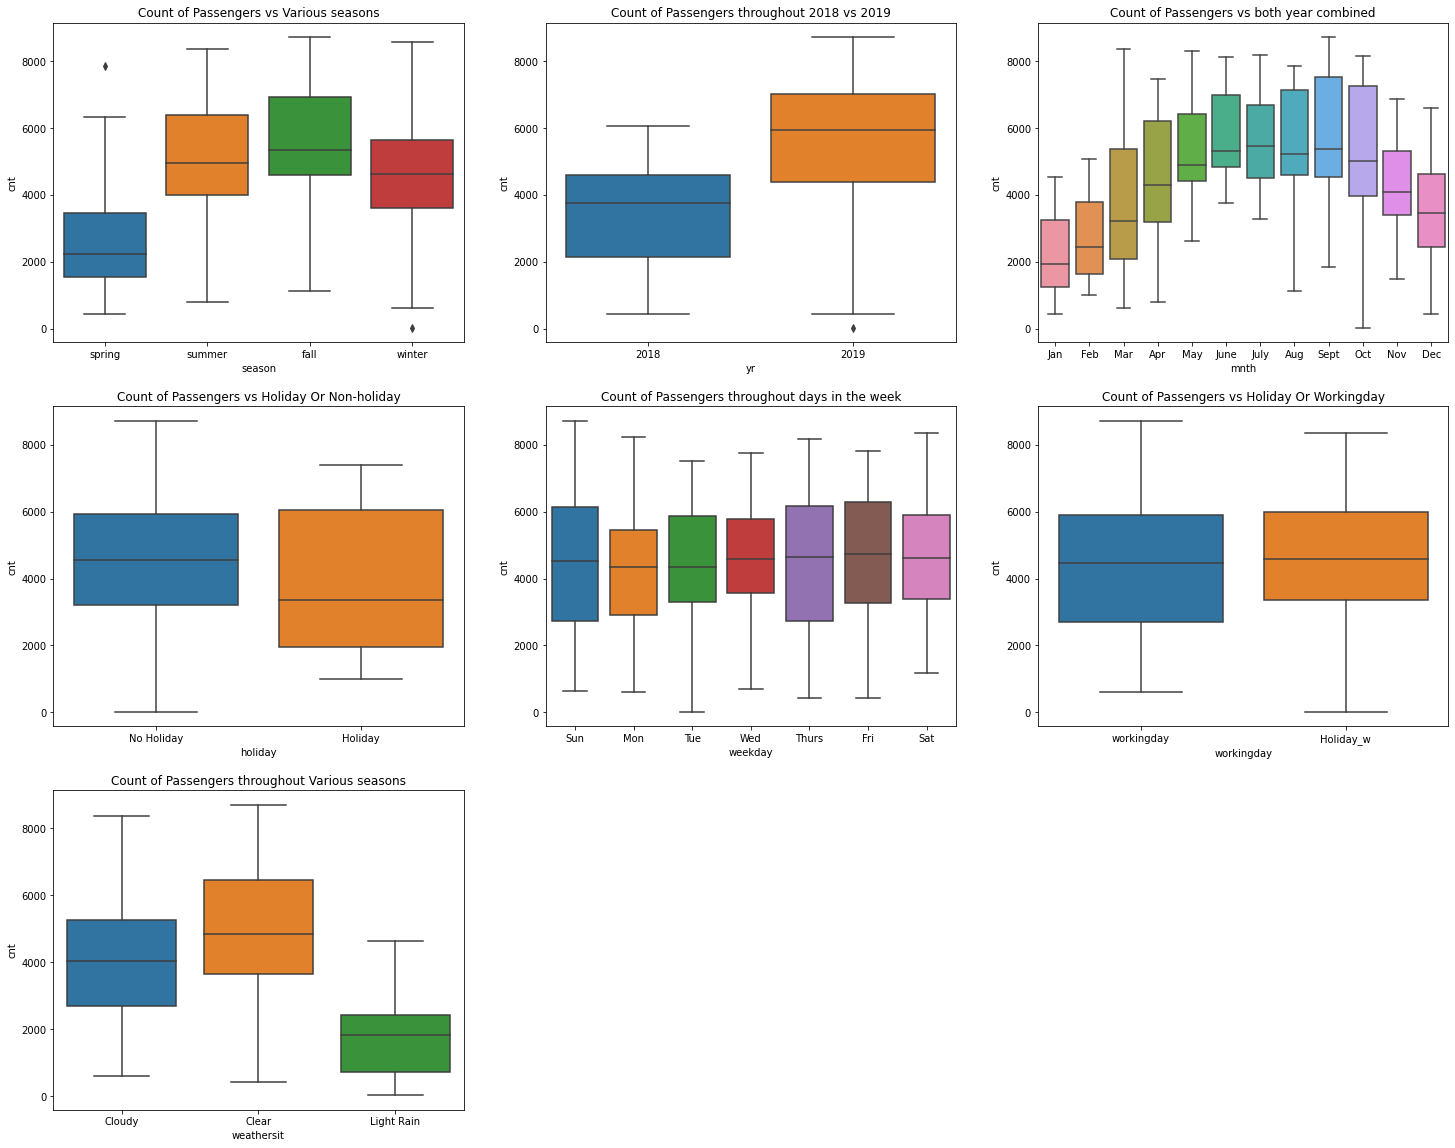

In [270]:
# Plotting box plot for categorical variables against 'cnt'
plt.figure(figsize=(25,20)) ## to control the figure size

plt.subplot(3,3,1)
sb.boxplot(x='season',y='cnt',data=bike).set_title('Count of Passengers vs Various seasons')

plt.subplot(3,3,2)
sb.boxplot(x='yr',y='cnt',data=bike).set_title('Count of Passengers throughout 2018 vs 2019')

plt.subplot(3,3,3)
sb.boxplot(x='mnth',y='cnt',data=bike).set_title('Count of Passengers vs both year combined')

plt.subplot(3,3,4)
sb.boxplot(x='holiday',y='cnt',data=bike).set_title('Count of Passengers vs Holiday Or Non-holiday')

plt.subplot(3,3,5)
sb.boxplot(x='weekday',y='cnt',data=bike).set_title('Count of Passengers throughout days in the week')


plt.subplot(3,3,6)
sb.boxplot(x='workingday',y='cnt',data=bike).set_title('Count of Passengers vs Holiday Or Workingday')

plt.subplot(3,3,7)
sb.boxplot(x='weathersit',y='cnt',data=bike).set_title('Count of Passengers throughout Various seasons')

plt.show()

### Few observations from above Boxplot:
1. Median of bike rental count is highest for fall season. Need to check the statistical significance of this.
2. Also maximum bike rental count is for fall season.
3. Median of bike rental count is highest for year 2019. Also maximum bike rental count is for year 2019.
4. Highest bike rental count is for month 9 i.e. September.
5. Median of bike rental count is highest for month 7 i.e. July.
6. Lowest bike rental count is for month 10 i.e. October.
7. Median and highest bike rental count is for no holiday days marked with 0.
8. Bike rental median for all days are almost close to each other.
9. Bike rental median for working/non-working days are almost close to each other.
10. Bike rental median is highest for weathersit Clear. Also maximum bike rental count is for weathersit Clear and lowest is for weathersit Light Rain.

### Plotting scatter plot for numerical variables against our target variable 'cnt'


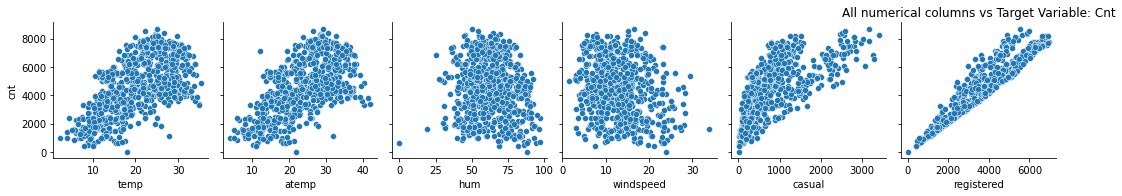

In [271]:
sb.pairplot(bike,x_vars=["temp", "atemp", "hum",'windspeed','casual','registered'], y_vars=['cnt'])
plt.title("All numerical columns vs Target Variable: Cnt")
plt.show()

## Few observations from above pairplot:

1. casual is correlated with registered and cnt. And thats obvious because <u>casual + registered = cnt</u><br>

2. We need to take care of these correlations among possible predictor variables to avoid multicollinearity once we start building our Multiple Linear Regression Model.<br>

3. Also we will not use casual and registered in our preprocessed data for model training. This might leak out the crucial information and model might get overfit.<br>

#### Let's check the correlation coefficients to see which variables are highly correlated to the target varibale "cnt"


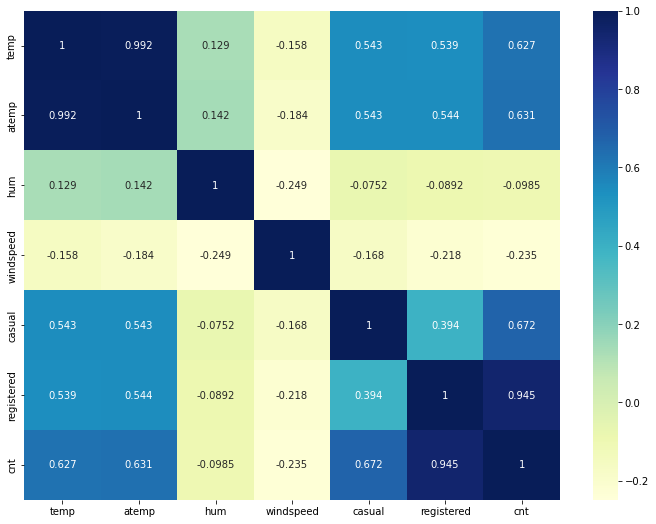

In [272]:
plt.figure(figsize = (12, 9))
sb.heatmap(bike.corr(), annot = True, fmt='0.3g', cmap="YlGnBu")
plt.show()

## Few observations from above heat map:
1) Apart from casual and registered ,the column atemp is having highest correlation coefficient with cnt followed by temp.<br>
2) holiday is negatively correlated with cnt.<br> 
6) Similarly need to check the statistical significance for  workingday, hum and windspeed.<br>

# Step 3 :Data Preparation
- Create dummy variables for all the categorical variables like 0 and 1
  - We need to convert them into dummy variables, because machines does not understand their indivisual meanings. 
- Splitting into test and trainning set
  - Split the whole dataset into 70:30 trainning and testing set. 
- Re-scaling the variables
  - We need to scale the numerical columns also because they range from 12 to 1349 which would increase our    processing time and also not give us clear co-efficients which can be easily calculated or infered. This means that one co-efficient can be a huge number giving us an impression that is very important which might not be the case.

<u>Dummy Variable Encoding<u>

In [273]:
# 1. Convert the categorical data into dummy variables with drop_first so that the machine uses k-1 columns
# Create a new dataframe to store them
status=pd.get_dummies(bike[['yr','holiday','workingday','season','mnth','weekday','weathersit']],drop_first=True)
status.head()

,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [274]:
# We then join orignal data and the dummy variable dataframe 'status'.
bike=pd.concat([bike,status],axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,spring,2018,Jan,No Holiday,Sun,workingday,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,spring,2018,Jan,No Holiday,Mon,workingday,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,spring,2018,Jan,No Holiday,Tue,Holiday_w,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,spring,2018,Jan,No Holiday,Wed,Holiday_w,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,spring,2018,Jan,No Holiday,Thurs,Holiday_w,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [275]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,spring,2018,Jan,No Holiday,Sun,workingday,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,spring,2018,Jan,No Holiday,Mon,workingday,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,spring,2018,Jan,No Holiday,Tue,Holiday_w,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,spring,2018,Jan,No Holiday,Wed,Holiday_w,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,spring,2018,Jan,No Holiday,Thurs,Holiday_w,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


- Drop the columns which already have dummy columns 
- The season , weathersit , mnth,weekday we create a dummy column for that so we drop these columns
- I drop the casual and registerd column as casual + registered = cnt which is already exist so I drop the casual and registerd columns

In [276]:
# We then drop the indivisual columns whose dummy variables have been created.
bike=bike.drop(['season','yr','holiday','mnth','workingday','weekday','weathersit'],axis=1)
bike.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [277]:
bike.shape

(730, 32)

In [278]:
bike.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [279]:
# Create df_train and df_test split from the dataframe and check their shape
df_train,df_test=train_test_split(bike,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 32)
(220, 32)


<h4><u> Rescaling the Features</u></h4> 

- So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is kind of mendatory thing to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:
  1. Min-Max scaling 
  2. Standardisation (mean-0, sigma-1) 
-  We will use MinMax scaling
- So we saw that the temp,atemp,hum,windespeed,cnt should be scaled except the dummy variables and '0-1' variables



In [280]:
# Create an object to be scaled
scaler=MinMaxScaler()
# Make list of all the variables to be scaled
var_scale=['temp','atemp','hum','windspeed','casual','registered','cnt']
# Scale all the numeric variables between 0 to 1
df_train[var_scale]=scaler.fit_transform(df_train[var_scale]) 
df_train.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
576,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
728,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
111,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554,0.191095,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


<h5>As we can see from above table, all values have been mapped between 0 and 1 where maximum value is 1 and minimum value is 0. This has been performed by MinMaxScaler().</h5><br>
  

In [281]:
df_train.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.254689,0.523781,0.513499,0.507843,0.974510,0.323529,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.345098,0.029412
std,0.225858,0.212410,0.145846,0.169803,0.206015,0.227896,0.224421,0.500429,0.157763,0.468282,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.542596,0.529718,0.653714,0.296763,0.212740,0.525123,0.518638,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


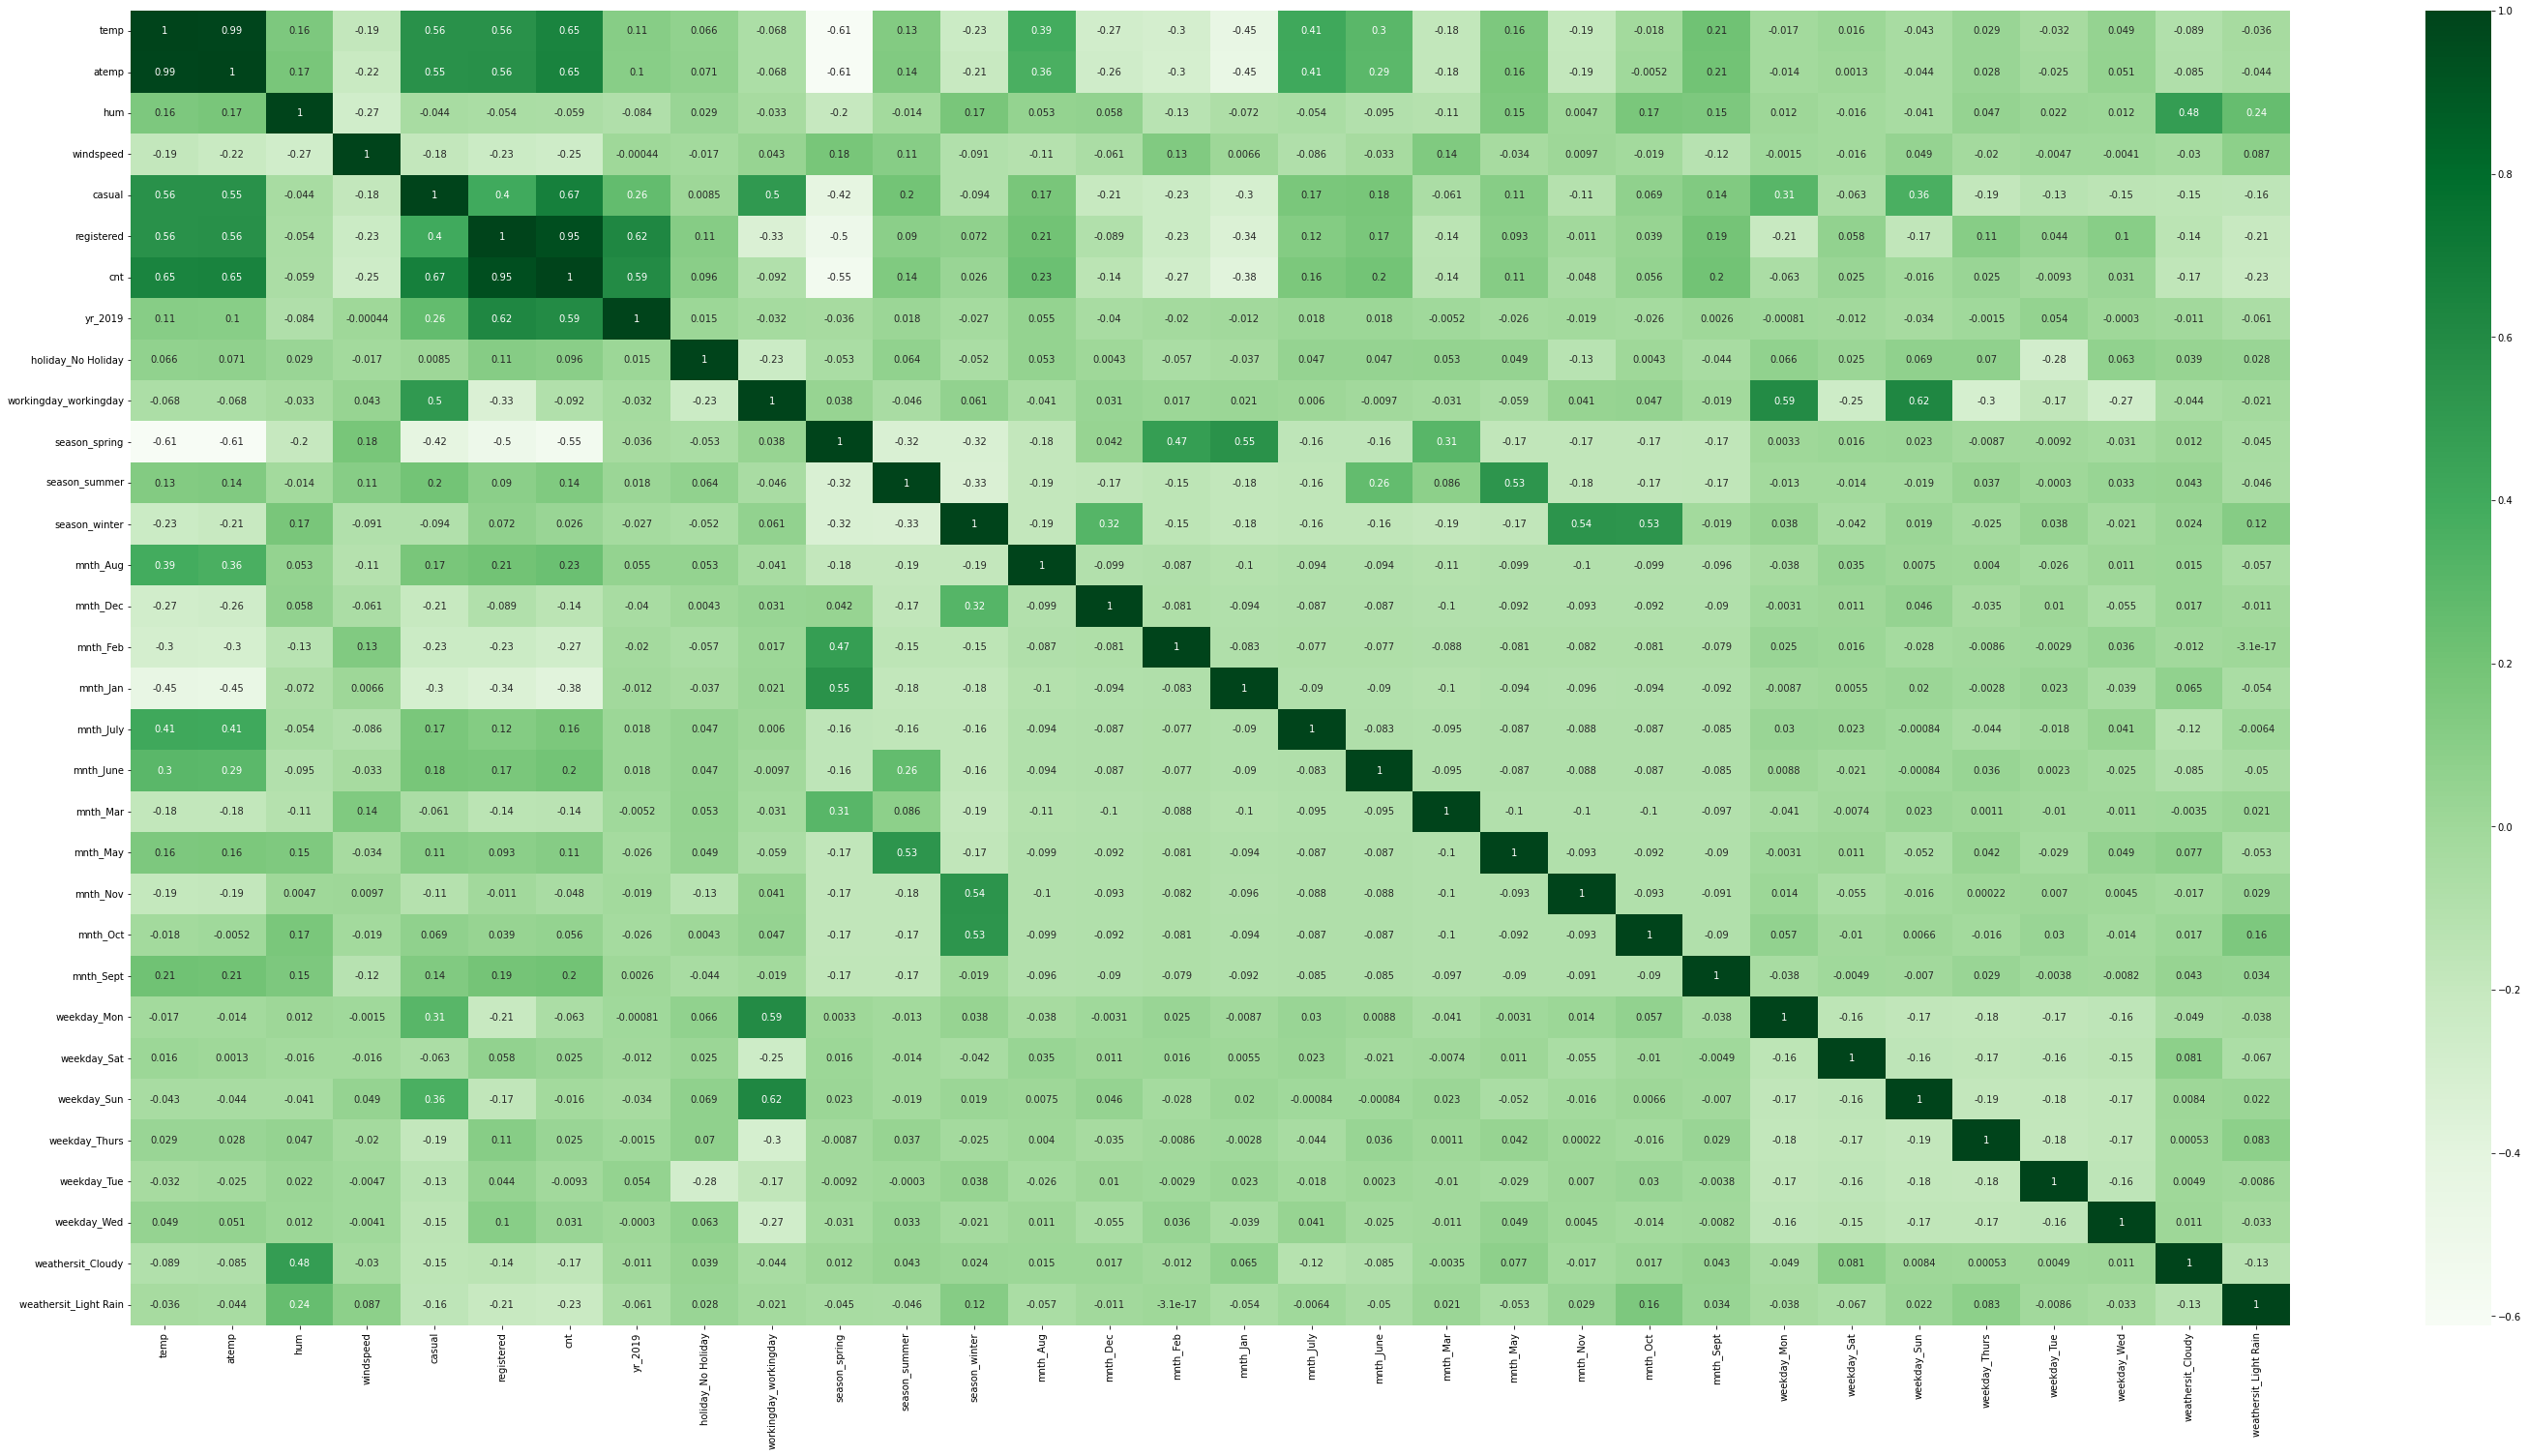

In [282]:
# Let's check the correlation coefficients to see which variables are highly correlated
# Plot the co-relation graph to check the co-relation between dumy variables
plt.figure(figsize=(50,25))
sb.heatmap(df_train.corr(),annot=True,cmap='Greens')
plt.show()

#### <u><h4>Spliting the data </h4></u><br> For going further to  build the model of training data we first Split the data into X and y
- Assigning all feature variables to X_train
- Assigning the target variable to y_train

In [283]:
# Split df_train further into X_train and y_train
y_train=df_train.pop('cnt')
X_train=df_train

# Training The Model
- To train the model there is two option either take one variable at a time with target varible and build the model which is known as a Forward Selection
- On the other side , we can take all the variable and drop the columns and which does not help to put good impact to the model building which is known as Backward Selection

- In this case , I used a <u>Backward Selection</u>

<b>Backward Selection</b>: This type of selection help which  varible should be drop by see the statastics  of P-values and VIF

# Model 1
- To make the first model we have add constrant to x_train variable
- By using statsmodel.api we fit the model
- After fitting we saw the parameters and summary of the first model we created 
- We saw in summary that the r-squared value is too low which show that model is very bad and we have to make changes by checking the p- values and also we have to create the VIF

In [284]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.612e+30
Date:                Wed, 30 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:25:29   Log-Likelihood:                 17069.
No. Observations:                 510   AIC:                        -3.408e+04
Df Residuals:                     479   BIC:                        -3.394e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   1.18e-16   3.49e-16      0.338      0.736   -5.68e-16    8.04e-16
temp                   -7.91e-16   1.18e-15     -0.669      0.504   -3.11e-15    1.53e-15
atemp                  6.314e-16   1.14e-15      0.554      0.580   -1.61e-15    2.87e-15
hum                    2.578e-16   3.22e-16      0.800      0.424   -3.75e-16    8.91e-16
windspeed               2.22e-16   2.28e-16      0.974      0.331   -2.26e-16     6.7e-16
casual                    0.3775   3.32e-16   1.14e+15      0.000       0.377       0.377
registered                0.7968   3.94e-16   2.02e+15      0.000       0.797       0.797
yr_2019               -1.865e-16   1.16e-16     -1.601      0.110   -4.15e-16    4.23e-17
holiday_No Holiday    -1.162e-16   1.56e-16     -0.746      0.456   -4.22e-16     1.9e-16
workingday_workingday -4.038e-16   1.33e-16     -3.030      0.003   -6.66e-16   -1.42e-16
season_spring          1.804e-16   2.47e-16      0.729      0.466   -3.06e-16    6.67e-16
season_summer         -1.561e-16   2.17e-16     -0.721      0.471   -5.82e-16    2.69e-16
season_winter         -3.009e-17   2.36e-16     -0.128      0.899   -4.93e-16    4.33e-16
mnth_Aug              -1.041e-16   2.79e-16     -0.373      0.709   -6.52e-16    4.44e-16
mnth_Dec              -5.898e-17   2.77e-16     -0.213      0.832   -6.04e-16    4.86e-16
mnth_Feb               6.592e-17   2.71e-16      0.243      0.808   -4.67e-16    5.99e-16
mnth_Jan               2.724e-16   2.77e-16      0.983      0.326   -2.72e-16    8.17e-16
mnth_July             -3.469e-17   2.89e-16     -0.120      0.904   -6.02e-16    5.32e-16
mnth_June              6.939e-17   2.06e-16      0.336      0.737   -3.36e-16    4.75e-16
mnth_Mar               1.058e-16   2.02e-16      0.524      0.601   -2.91e-16    5.03e-16
mnth_May               3.296e-17   1.75e-16      0.189      0.851   -3.11e-16    3.76e-16
mnth_Nov              -5.898e-17      3e-16     -0.197      0.844   -6.48e-16     5.3e-16
mnth_Oct               8.327e-17   2.96e-16      0.281      0.779   -4.98e-16    6.65e-16
mnth_Sept              6.245e-17   2.65e-16      0.235      0.814   -4.59e-16    5.84e-16
weekday_Mon            2.706e-16   1.62e-16      1.666      0.096   -4.85e-17     5.9e-16
weekday_Sat            6.085e-17   1.29e-16      0.471      0.638   -1.93e-16    3.15e-16
weekday_Sun            5.295e-16   1.59e-16      3.338      0.001    2.18e-16    8.41e-16
weekday_Thurs           5.66e-17   1.21e-16      0.468      0.640   -1.81e-16    2.94e-16
weekday_Tue            6.418e-17   1.25e-16      0.515      0.607   -1.81e-16    3.09e-16
weekday_Wed            2.325e-16   1.27e-16      1.833      0.067   -1.68e-17    4.82e-16
weathersit_Cloudy      5.031e-17   8.87e-17      0.567      0.571   -1.24e-16    2.25e-16
weathersit_Light Rain -

- Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

<b>Maybe we could drop some?</b>
- We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the   VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

#### Creating the VIF


In [285]:
vif = pd.DataFrame()
X= X_train
vif["Features"]= X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
7,holiday_No Holiday,145.87
0,temp,68.41
8,workingday_workingday,60.00
1,atemp,56.19
25,weekday_Sun,35.11
23,weekday_Mon,33.11
9,season_spring,10.84
11,season_winter,9.95
10,season_summer,8.40
5,registered,7.74


#### The VIF should be less than 5 
- We see that the some of the variables have the VIF greater than 5 . We will remove them 
- But first we have to remove the variables with high p-value,low VIF

- The atemp variable have high p-value i.e 0.580  and also it is co-related to temp .
- Moreover we have they both are correlated to each other
- So we can start the building second model by dropping the atemp

# Model 2:

In [286]:
X= X.drop('atemp',1)

C:\Users\asd\AppData\Local\Temp\ipykernel_13576\3876336948.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X= X.drop('atemp',1)


In [287]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.714e+29
Date:                Wed, 30 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:25:29   Log-Likelihood:                 16836.
No. Observations:                 510   AIC:                        -3.361e+04
Df Residuals:                     480   BIC:                        -3.349e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.173e-15    5.5e-16      2.133      0.033    9.22e-17    2.25e-15
temp                  -2.151e-16   6.58e-16     -0.327      0.744   -1.51e-15    1.08e-15
hum                   -7.358e-17   5.07e-16     -0.145      0.885   -1.07e-15    9.24e-16
windspeed              8.674e-17   3.52e-16      0.246      0.806   -6.05e-16    7.78e-16
casual                    0.3775   5.22e-16   7.22e+14      0.000       0.377       0.377
registered                0.7968    6.2e-16   1.28e+15      0.000       0.797       0.797
yr_2019                2.602e-18   1.83e-16      0.014      0.989   -3.58e-16    3.63e-16
holiday_No Holiday    -3.279e-16   2.45e-16     -1.337      0.182    -8.1e-16    1.54e-16
workingday_workingday -3.417e-16    2.1e-16     -1.627      0.104   -7.54e-16    7.09e-17
season_spring         -3.123e-17    3.9e-16     -0.080      0.936   -7.97e-16    7.34e-16
season_summer         -6.939e-17   3.41e-16     -0.204      0.839   -7.39e-16       6e-16
season_winter          4.228e-17   3.71e-16      0.114      0.909   -6.87e-16    7.72e-16
mnth_Aug               2.429e-16   4.35e-16      0.558      0.577   -6.13e-16     1.1e-15
mnth_Dec               3.053e-16   4.37e-16      0.699      0.485   -5.53e-16    1.16e-15
mnth_Feb                1.37e-16   4.28e-16      0.320      0.749   -7.03e-16    9.77e-16
mnth_Jan               2.776e-16   4.37e-16      0.635      0.525   -5.81e-16    1.14e-15
mnth_July              9.714e-17   4.53e-16      0.214      0.830   -7.94e-16    9.88e-16
mnth_June              2.845e-16   3.22e-16      0.883      0.378   -3.49e-16    9.18e-16
mnth_Mar               2.498e-16   3.18e-16      0.785      0.433   -3.76e-16    8.75e-16
mnth_May               4.571e-16   2.74e-16      1.668      0.096   -8.15e-17    9.96e-16
mnth_Nov               1.561e-16   4.72e-16      0.331      0.741   -7.72e-16    1.08e-15
mnth_Oct               2.394e-16   4.66e-16      0.513      0.608   -6.77e-16    1.16e-15
mnth_Sept              1.943e-16   4.17e-16      0.466      0.642   -6.25e-16    1.01e-15
weekday_Mon            4.163e-16   2.56e-16      1.628      0.104   -8.63e-17    9.19e-16
weekday_Sat            -5.28e-17   2.03e-16     -0.260      0.795   -4.52e-16    3.46e-16
weekday_Sun            3.404e-16    2.5e-16      1.363      0.174   -1.51e-16    8.31e-16
weekday_Thurs          4.662e-17    1.9e-16      0.245      0.807   -3.27e-16    4.21e-16
weekday_Tue            2.992e-17   1.96e-16      0.152      0.879   -3.56e-16    4.16e-16
weekday_Wed            1.023e-16      2e-16      0.512      0.609    -2.9e-16    4.95e-16
weathersit_Cloudy      2.758e-16    1.4e-16      1.973      0.049    1.19e-18     5.5e-16
weathersit_Light Rain -2.637e-16   3.76e-16     -0.702      0.483      -1e-15    4.75e-16
=======================

In [288]:
vif = pd.DataFrame()
X = X
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif["VIF"] =round(vif["VIF"],2)
vif = vif.sort_values(by= "VIF",ascending=False)
vif

,Features,VIF
6,holiday_No Holiday,145.87
7,workingday_workingday,59.97
24,weekday_Sun,35.08
22,weekday_Mon,33.08
8,season_spring,10.82
10,season_winter,9.94
0,temp,8.54
9,season_summer,8.37
4,registered,7.72
19,mnth_Nov,6.81


<b>So the VIF value dropped of Model:2 as compared to Model:1 we created</b>

- After doing the above step of high p-value and low VIF
- We can now do the high VIF and low p-value 

# Model:3

In [289]:
# The highest VIF is holiday_No Holiday feature so we can drop this

X = X.drop('holiday_No Holiday',1)


C:\Users\asd\AppData\Local\Temp\ipykernel_13576\3772296396.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('holiday_No Holiday',1)


In [290]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.041e+30
Date:                Wed, 30 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:25:30   Log-Likelihood:                 16948.
No. Observations:                 510   AIC:                        -3.384e+04
Df Residuals:                     480   BIC:                        -3.371e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7.147e-16   4.99e-16      1.432      0.153   -2.66e-16     1.7e-15
temp                  -4.788e-16   5.29e-16     -0.906      0.365   -1.52e-15     5.6e-16
hum                    4.648e-16   4.08e-16      1.140      0.255   -3.36e-16    1.27e-15
windspeed              1.023e-16   2.83e-16      0.362      0.717   -4.53e-16    6.58e-16
casual                    0.3775    4.2e-16      9e+14      0.000       0.377       0.377
registered                0.7968   4.98e-16    1.6e+15      0.000       0.797       0.797
yr_2019               -2.602e-16   1.47e-16     -1.768      0.078   -5.49e-16     2.9e-17
workingday_workingday -3.296e-17   2.96e-16     -0.111      0.911   -6.14e-16    5.48e-16
season_spring          1.527e-16   3.13e-16      0.488      0.626   -4.62e-16    7.67e-16
season_summer          1.353e-16   2.74e-16      0.494      0.621   -4.02e-16    6.73e-16
season_winter          1.746e-16   2.98e-16      0.585      0.559   -4.11e-16    7.61e-16
mnth_Aug              -2.151e-16    3.5e-16     -0.615      0.539   -9.02e-16    4.72e-16
mnth_Dec              -2.741e-16   3.51e-16     -0.781      0.435   -9.63e-16    4.15e-16
mnth_Feb              -7.234e-16   3.43e-16     -2.106      0.036    -1.4e-15   -4.85e-17
mnth_Jan               -4.77e-16   3.51e-16     -1.360      0.174   -1.17e-15    2.12e-16
mnth_July             -1.249e-16   3.64e-16     -0.343      0.732    -8.4e-16     5.9e-16
mnth_June             -3.053e-16   2.59e-16     -1.180      0.239   -8.14e-16    2.03e-16
mnth_Mar              -2.758e-16   2.56e-16     -1.079      0.281   -7.78e-16    2.27e-16
mnth_May               1.327e-16    2.2e-16      0.603      0.547      -3e-16    5.65e-16
mnth_Nov              -3.747e-16   3.79e-16     -0.988      0.324   -1.12e-15     3.7e-16
mnth_Oct              -1.839e-16   3.74e-16     -0.491      0.624    -9.2e-16    5.52e-16
mnth_Sept             -1.041e-17   3.35e-16     -0.031      0.975   -6.69e-16    6.48e-16
weekday_Mon           -1.008e-16   3.17e-16     -0.318      0.751   -7.24e-16    5.22e-16
weekday_Sat            1.418e-16   1.63e-16      0.870      0.385   -1.79e-16    4.62e-16
weekday_Sun           -2.489e-16   3.18e-16     -0.782      0.434   -8.74e-16    3.76e-16
weekday_Thurs          4.233e-16   1.53e-16      2.769      0.006    1.23e-16    7.24e-16
weekday_Tue            2.858e-16   1.58e-16      1.811      0.071   -2.42e-17    5.96e-16
weekday_Wed            3.695e-16   1.61e-16      2.302      0.022    5.41e-17    6.85e-16
weathersit_Cloudy     -2.585e-16   1.12e-16     -2.303      0.022   -4.79e-16   -3.79e-17
weathersit_Light Rain  7.459e-17   3.02e-16      0.247      0.805   -5.19e-16    6.68e-16
==============================================================================
Omnibus:                       13.

In [291]:
vif = pd.DataFrame()
X = X 
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF",ascending = False)
vif

,Features,VIF
0,temp,51.95
4,registered,41.55
1,hum,38.70
6,workingday_workingday,16.84
9,season_winter,12.93
7,season_spring,11.95
3,casual,11.29
23,weekday_Sun,9.36
21,weekday_Mon,8.54
8,season_summer,7.72


# Model:4
- Now we can remove the with high p-value and high VIF which is workingday_workingday feature
- It might be redundant to the model because weekdays already have that data
- The VIF of workingday_workingday is 16.84 and p-value is 0.9 which is too high

In [292]:
X= X.drop('workingday_workingday',1)


C:\Users\asd\AppData\Local\Temp\ipykernel_13576\2903492760.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X= X.drop('workingday_workingday',1)


In [293]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.087e+30
Date:                Wed, 30 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:25:30   Log-Likelihood:                 16950.
No. Observations:                 510   AIC:                        -3.384e+04
Df Residuals:                     481   BIC:                        -3.372e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7.772e-16   4.95e-16      1.570      0.117   -1.95e-16    1.75e-15
temp                  -6.939e-18   5.25e-16     -0.013      0.989   -1.04e-15    1.02e-15
hum                   -9.359e-16   4.06e-16     -2.308      0.021   -1.73e-15   -1.39e-16
windspeed             -6.072e-17   2.81e-16     -0.216      0.829   -6.14e-16    4.92e-16
casual                    0.3775   4.07e-16   9.29e+14      0.000       0.377       0.377
registered                0.7968   4.71e-16   1.69e+15      0.000       0.797       0.797
yr_2019                 1.44e-16   1.44e-16      1.001      0.317   -1.39e-16    4.27e-16
season_spring         -3.209e-16   3.12e-16     -1.030      0.304   -9.33e-16    2.91e-16
season_summer           4.51e-17   2.72e-16      0.166      0.869    -4.9e-16    5.81e-16
season_winter         -2.776e-16   2.97e-16     -0.935      0.350   -8.61e-16    3.06e-16
mnth_Aug               2.637e-16   3.48e-16      0.757      0.449   -4.21e-16    9.48e-16
mnth_Dec               5.655e-16   3.49e-16      1.621      0.106    -1.2e-16    1.25e-15
mnth_Feb                 6.8e-16   3.42e-16      1.991      0.047    8.79e-18    1.35e-15
mnth_Jan                4.51e-16   3.49e-16      1.292      0.197   -2.35e-16    1.14e-15
mnth_July             -5.274e-16   3.62e-16     -1.455      0.146   -1.24e-15    1.85e-16
mnth_June              4.163e-17   2.58e-16      0.162      0.872   -4.65e-16    5.48e-16
mnth_Mar                1.44e-16   2.55e-16      0.566      0.572   -3.56e-16    6.44e-16
mnth_May               1.041e-16   2.19e-16      0.475      0.635   -3.27e-16    5.35e-16
mnth_Nov               6.523e-16   3.76e-16      1.735      0.083   -8.66e-17    1.39e-15
mnth_Oct               8.465e-16   3.73e-16      2.271      0.024    1.14e-16    1.58e-15
mnth_Sept              2.741e-16   3.33e-16      0.823      0.411    -3.8e-16    9.28e-16
weekday_Mon            3.426e-17   2.08e-16      0.165      0.869   -3.74e-16    4.42e-16
weekday_Sat           -3.415e-17   1.62e-16     -0.211      0.833   -3.53e-16    2.85e-16
weekday_Sun            9.086e-17   2.03e-16      0.448      0.654   -3.08e-16    4.89e-16
weekday_Thurs          -4.64e-17   1.52e-16     -0.305      0.761   -3.45e-16    2.53e-16
weekday_Tue            1.696e-16   1.55e-16      1.092      0.276   -1.36e-16    4.75e-16
weekday_Wed           -6.592e-17    1.6e-16     -0.413      0.680    -3.8e-16    2.48e-16
weathersit_Cloudy      1.353e-16   1.11e-16      1.214      0.225   -8.37e-17    3.54e-16
weathersit_Light Rain  2.255e-17   2.98e-16      0.076      0.940   -5.64e-16    6.09e-16
==============================================================================
Omnibus:                        8.567   Durbin-Watson:                   0.311
Prob(Omnibus):                  0.014   Jarqu

In [294]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,51.28
1,hum,38.70
4,registered,37.77
8,season_winter,12.91
6,season_spring,11.93
3,casual,10.71
7,season_summer,7.69
18,mnth_Oct,6.34
9,mnth_Aug,6.13
17,mnth_Nov,5.99


- We see that the VIF value is drop. Also it might seems that p-value also change

# Model:5
- So temperature and hum are highly correlated to each other
- So the correlation have very high VIF and low p_value

In [295]:
# Temprature and Humidity are inversely co-related thus we would have to drop one of them. We would go with humidity
X=X.drop('hum',1)

C:\Users\asd\AppData\Local\Temp\ipykernel_13576\1113324476.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=X.drop('hum',1)


In [296]:
# Fit the model again
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.011e+29
Date:                Wed, 30 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:25:31   Log-Likelihood:                 16743.
No. Observations:                 510   AIC:                        -3.343e+04
Df Residuals:                     482   BIC:                        -3.331e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7.459e-16   6.94e-16      1.075      0.283   -6.18e-16    2.11e-15
temp                   -5.69e-16   7.47e-16     -0.762      0.446   -2.04e-15    8.98e-16
windspeed              6.193e-16   4.02e-16      1.541      0.124    -1.7e-16    1.41e-15
casual                    0.3775   6.07e-16   6.22e+14      0.000       0.377       0.377
registered                0.7968   7.01e-16   1.14e+15      0.000       0.797       0.797
yr_2019                5.811e-17   2.15e-16      0.270      0.787   -3.65e-16    4.81e-16
season_spring         -4.753e-16   4.67e-16     -1.017      0.310   -1.39e-15    4.43e-16
season_summer         -2.082e-17   4.07e-16     -0.051      0.959    -8.2e-16    7.78e-16
season_winter          2.197e-16   4.45e-16      0.494      0.621   -6.54e-16    1.09e-15
mnth_Aug                5.69e-16   5.22e-16      1.090      0.276   -4.57e-16     1.6e-15
mnth_Dec              -1.665e-16   5.17e-16     -0.322      0.748   -1.18e-15     8.5e-16
mnth_Feb               3.088e-16    5.1e-16      0.605      0.545   -6.94e-16    1.31e-15
mnth_Jan              -2.255e-17    5.2e-16     -0.043      0.965   -1.04e-15    9.99e-16
mnth_July              4.441e-16   5.43e-16      0.817      0.414   -6.23e-16    1.51e-15
mnth_June              6.661e-16   3.85e-16      1.729      0.084   -9.09e-17    1.42e-15
mnth_Mar               3.244e-16   3.81e-16      0.852      0.394   -4.23e-16    1.07e-15
mnth_May               5.794e-16   3.28e-16      1.769      0.078   -6.42e-17    1.22e-15
mnth_Nov              -1.874e-16   5.61e-16     -0.334      0.739   -1.29e-15    9.15e-16
mnth_Oct              -1.943e-16   5.55e-16     -0.350      0.726   -1.28e-15    8.96e-16
mnth_Sept              3.053e-16   4.96e-16      0.615      0.539    -6.7e-16    1.28e-15
weekday_Mon            5.378e-17   3.11e-16      0.173      0.863   -5.57e-16    6.65e-16
weekday_Sat           -1.078e-16   2.43e-16     -0.443      0.658   -5.86e-16     3.7e-16
weekday_Sun           -3.806e-17   3.04e-16     -0.125      0.900   -6.36e-16     5.6e-16
weekday_Thurs         -7.026e-17   2.28e-16     -0.308      0.758   -5.19e-16    3.78e-16
weekday_Tue            8.804e-17   2.33e-16      0.378      0.705   -3.69e-16    5.45e-16
weekday_Wed            5.378e-17   2.39e-16      0.225      0.822   -4.17e-16    5.24e-16
weathersit_Cloudy      1.128e-16   1.44e-16      0.782      0.435   -1.71e-16    3.96e-16
weathersit_Light Rain -1.544e-16   4.28e-16     -0.361      0.719   -9.96e-16    6.87e-16
==============================================================================
Omnibus:                       13.798   Durbin-Watson:                   0.183
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.512
Skew:                           0.361   Prob(JB):       

In [297]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,39.55
3,registered,37.76
7,season_winter,12.72
5,season_spring,11.46
2,casual,10.55
6,season_summer,6.57
8,mnth_Aug,5.94
4,yr_2019,5.90
17,mnth_Oct,5.88
16,mnth_Nov,5.42


# Model:6
- Registered VIF in very high so we have to drop the column

In [298]:
X=X.drop('registered',1)


C:\Users\asd\AppData\Local\Temp\ipykernel_13576\1832806051.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=X.drop('registered',1)


In [299]:
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     176.2
Date:                Wed, 30 Aug 2023   Prob (F-statistic):          1.15e-227
Time:                        16:25:31   Log-Likelihood:                 638.14
No. Observations:                 510   AIC:                            -1222.
Df Residuals:                     483   BIC:                            -1108.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2796      0.034      8.338      0.000       0.214       0.346
temp                      0.1646      0.038      4.346      0.000       0.090       0.239
windspeed                -0.0759      0.020     -3.707      0.000      -0.116      -0.036
casual                    0.5323      0.031     17.415      0.000       0.472       0.592
yr_2019                   0.1913      0.007     27.540      0.000       0.178       0.205
season_spring            -0.0477      0.024     -1.982      0.048      -0.095      -0.000
season_summer            -0.0044      0.021     -0.207      0.836      -0.046       0.037
season_winter             0.1125      0.022      5.022      0.000       0.068       0.157
mnth_Aug                  0.0327      0.027      1.215      0.225      -0.020       0.086
mnth_Dec                 -0.0337      0.027     -1.263      0.207      -0.086       0.019
mnth_Feb                 -0.0179      0.026     -0.677      0.498      -0.070       0.034
mnth_Jan                 -0.0495      0.027     -1.848      0.065      -0.102       0.003
mnth_July                 0.0035      0.028      0.124      0.901      -0.052       0.059
mnth_June                 0.0393      0.020      1.982      0.048       0.000       0.078
mnth_Mar                 -0.0057      0.020     -0.291      0.771      -0.044       0.033
mnth_May                  0.0364      0.017      2.161      0.031       0.003       0.070
mnth_Nov                 -0.0654      0.029     -2.268      0.024      -0.122      -0.009
mnth_Oct                 -0.0437      0.029     -1.527      0.127      -0.100       0.013
mnth_Sept                 0.0534      0.026      2.092      0.037       0.003       0.104
weekday_Mon              -0.1715      0.014    -12.208      0.000      -0.199      -0.144
weekday_Sat              -0.0139      0.013     -1.110      0.267      -0.039       0.011
weekday_Sun              -0.1342      0.014     -9.261      0.000      -0.163      -0.106
weekday_Thurs             0.0126      0.012      1.068      0.286      -0.011       0.036
weekday_Tue              -0.0327      0.012     -2.735      0.006      -0.056      -0.009
weekday_Wed              -0.0005      0.012     -0.037      0.971      -0.025       0.024
weathersit_Cloudy        -0.0507      0.007     -7.159      0.000      -0.065      -0.037
weathersit_Light Rain    -0.2020      0.020    -10.031      0.000      -0.242      -0.162
==============================================================================
Omnibus:                      202.546   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1185.032
Skew:                          -1.633   Prob(JB):                    4.72e-258
Kurtosis:                       9.715   Cond. No.                  

- <b>So R-squared is 0.905 which is good . but the VIF have still to high . 
- So we have to lower the VIF by removing the un reasonable varibale for the data</b>

In [300]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,31.91
6,season_winter,11.49
4,season_spring,11.38
2,casual,10.09
5,season_summer,5.99
16,mnth_Oct,5.84
7,mnth_Aug,5.63
15,mnth_Nov,5.37
1,windspeed,5.24
11,mnth_July,5.20


# Model 7:
- Next big VIF is of season spring and it's p-value is 0.048. I think the year 2018 and 2019 are capturing the data that is being presented by season spring. Season spring has a very high co-relation with temp

In [301]:
X=X.drop('season_spring',1)

C:\Users\asd\AppData\Local\Temp\ipykernel_13576\104817038.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=X.drop('season_spring',1)


In [302]:
# Fit the model again
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     182.0
Date:                Wed, 30 Aug 2023   Prob (F-statistic):          5.91e-228
Time:                        16:25:32   Log-Likelihood:                 636.08
No. Observations:                 510   AIC:                            -1220.
Df Residuals:                     484   BIC:                            -1110.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2501      0.030      8.298      0.000       0.191       0.309
temp                      0.1729      0.038      4.582      0.000       0.099       0.247
windspeed                -0.0787      0.020     -3.840      0.000      -0.119      -0.038
casual                    0.5328      0.031     17.382      0.000       0.473       0.593
yr_2019                   0.1910      0.007     27.417      0.000       0.177       0.205
season_summer             0.0227      0.016      1.414      0.158      -0.009       0.054
season_winter             0.1392      0.018      7.758      0.000       0.104       0.174
mnth_Aug                  0.0568      0.024      2.351      0.019       0.009       0.104
mnth_Dec                 -0.0387      0.027     -1.452      0.147      -0.091       0.014
mnth_Feb                 -0.0367      0.025     -1.489      0.137      -0.085       0.012
mnth_Jan                 -0.0679      0.025     -2.695      0.007      -0.117      -0.018
mnth_July                 0.0270      0.026      1.060      0.290      -0.023       0.077
mnth_June                 0.0464      0.020      2.371      0.018       0.008       0.085
mnth_Mar                 -0.0184      0.019     -0.984      0.326      -0.055       0.018
mnth_May                  0.0347      0.017      2.057      0.040       0.002       0.068
mnth_Nov                 -0.0646      0.029     -2.232      0.026      -0.121      -0.008
mnth_Oct                 -0.0441      0.029     -1.538      0.125      -0.101       0.012
mnth_Sept                 0.0723      0.024      3.042      0.002       0.026       0.119
weekday_Mon              -0.1725      0.014    -12.247      0.000      -0.200      -0.145
weekday_Sat              -0.0143      0.013     -1.137      0.256      -0.039       0.010
weekday_Sun              -0.1355      0.015     -9.334      0.000      -0.164      -0.107
weekday_Thurs             0.0118      0.012      0.997      0.319      -0.011       0.035
weekday_Tue              -0.0327      0.012     -2.731      0.007      -0.056      -0.009
weekday_Wed              -0.0009      0.012     -0.075      0.940      -0.025       0.023
weathersit_Cloudy        -0.0506      0.007     -7.112      0.000      -0.065      -0.037
weathersit_Light Rain    -0.1997      0.020     -9.905      0.000      -0.239      -0.160
==============================================================================
Omnibus:                      198.042   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1132.704
Skew:                          -1.599   Prob(JB):                    1.09e-246
Kurtosis:                       9.564   Cond. No.                         32.0
==============================================================================

In [303]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,30.51
2,casual,10.09
5,season_winter,7.96
15,mnth_Oct,5.54
6,mnth_Aug,5.07
1,windspeed,5.02
14,mnth_Nov,4.98
10,mnth_July,4.71
4,season_summer,4.32
16,mnth_Sept,3.74


# Model: 8
- Temprature and Casual have a high co-relation of 0.56 and also VIF is very high 10.09 thus we would need to remove casual 

In [304]:
X=X.drop('casual',1)

C:\Users\asd\AppData\Local\Temp\ipykernel_13576\3910949851.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=X.drop('casual',1)


In [305]:
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     109.2
Date:                Wed, 30 Aug 2023   Prob (F-statistic):          2.43e-178
Time:                        16:25:32   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -974.8
Df Residuals:                     485   BIC:                            -868.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2437      0.038      6.351      0.000       0.168       0.319
temp                      0.3954      0.045      8.748      0.000       0.307       0.484
windspeed                -0.1626      0.025     -6.409      0.000      -0.212      -0.113
yr_2019                   0.2368      0.008     28.851      0.000       0.221       0.253
season_summer             0.0617      0.020      3.052      0.002       0.022       0.101
season_winter             0.1373      0.023      6.011      0.000       0.092       0.182
mnth_Aug                  0.0461      0.031      1.499      0.135      -0.014       0.106
mnth_Dec                 -0.0774      0.034     -2.291      0.022      -0.144      -0.011
mnth_Feb                 -0.0704      0.031     -2.248      0.025      -0.132      -0.009
mnth_Jan                 -0.1057      0.032     -3.310      0.001      -0.169      -0.043
mnth_July                -0.0010      0.032     -0.032      0.975      -0.065       0.063
mnth_June                 0.0240      0.025      0.963      0.336      -0.025       0.073
mnth_Mar                 -0.0186      0.024     -0.784      0.433      -0.065       0.028
mnth_May                  0.0190      0.021      0.884      0.377      -0.023       0.061
mnth_Nov                 -0.0687      0.037     -1.866      0.063      -0.141       0.004
mnth_Oct                 -0.0163      0.036     -0.447      0.655      -0.088       0.055
mnth_Sept                 0.0914      0.030      3.022      0.003       0.032       0.151
weekday_Mon              -0.0488      0.015     -3.155      0.002      -0.079      -0.018
weekday_Sat               0.0099      0.016      0.624      0.533      -0.021       0.041
weekday_Sun               0.0092      0.015      0.608      0.544      -0.021       0.039
weekday_Thurs             0.0029      0.015      0.194      0.846      -0.027       0.032
weekday_Tue              -0.0241      0.015     -1.579      0.115      -0.054       0.006
weekday_Wed              -0.0093      0.016     -0.591      0.555      -0.040       0.022
weathersit_Cloudy        -0.0815      0.009     -9.306      0.000      -0.099      -0.064
weathersit_Light Rain    -0.2915      0.025    -11.765      0.000      -0.340      -0.243
==============================================================================
Omnibus:                       95.485   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.165
Skew:                          -0.886   Prob(JB):                     5.35e-62
Kurtosis:                       6.184   Cond. No.                         31.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

In [306]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,25.18
4,season_winter,7.96
14,mnth_Oct,5.53
5,mnth_Aug,5.07
13,mnth_Nov,4.98
1,windspeed,4.71
9,mnth_July,4.68
3,season_summer,4.20
15,mnth_Sept,3.73
6,mnth_Dec,3.27


<b> So the VIF is dropped too much but R2 remain same

# Model: 9
- We can see that the p- value of mnth-july is too high i.e 0.975 . So we have to drop this as it badly effect to the model

In [307]:
X=X.drop('mnth_July',1)

C:\Users\asd\AppData\Local\Temp\ipykernel_13576\997198080.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=X.drop('mnth_July',1)


In [308]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     114.2
Date:                Wed, 30 Aug 2023   Prob (F-statistic):          2.25e-179
Time:                        16:25:32   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -976.8
Df Residuals:                     486   BIC:                            -875.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2434      0.037      6.539      0.000       0.170       0.317
temp                      0.3947      0.040      9.781      0.000       0.315       0.474
windspeed                -0.1625      0.025     -6.448      0.000      -0.212      -0.113
yr_2019                   0.2368      0.008     28.981      0.000       0.221       0.253
season_summer             0.0621      0.016      3.771      0.000       0.030       0.094
season_winter             0.1373      0.023      6.017      0.000       0.092       0.182
mnth_Aug                  0.0468      0.018      2.571      0.010       0.011       0.083
mnth_Dec                 -0.0770      0.030     -2.551      0.011      -0.136      -0.018
mnth_Feb                 -0.0699      0.028     -2.498      0.013      -0.125      -0.015
mnth_Jan                 -0.1053      0.029     -3.596      0.000      -0.163      -0.048
mnth_June                 0.0245      0.019      1.315      0.189      -0.012       0.061
mnth_Mar                 -0.0182      0.020     -0.899      0.369      -0.058       0.022
mnth_May                  0.0193      0.019      1.014      0.311      -0.018       0.057
mnth_Nov                 -0.0682      0.033     -2.065      0.039      -0.133      -0.003
mnth_Oct                 -0.0157      0.031     -0.504      0.614      -0.077       0.045
mnth_Sept                 0.0921      0.020      4.588      0.000       0.053       0.132
weekday_Mon              -0.0489      0.015     -3.161      0.002      -0.079      -0.018
weekday_Sat               0.0099      0.016      0.624      0.533      -0.021       0.041
weekday_Sun               0.0092      0.015      0.608      0.544      -0.021       0.039
weekday_Thurs             0.0029      0.015      0.195      0.846      -0.027       0.032
weekday_Tue              -0.0241      0.015     -1.581      0.114      -0.054       0.006
weekday_Wed              -0.0093      0.016     -0.592      0.554      -0.040       0.022
weathersit_Cloudy        -0.0815      0.009     -9.320      0.000      -0.099      -0.064
weathersit_Light Rain    -0.2915      0.025    -11.786      0.000      -0.340      -0.243
==============================================================================
Omnibus:                       95.600   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.745
Skew:                          -0.887   Prob(JB):                     4.01e-62
Kurtosis:                       6.187   Cond. No.                         27.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [309]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,8.70
4,season_winter,7.96
1,windspeed,4.70
13,mnth_Oct,4.27
12,mnth_Nov,4.26
3,season_summer,2.91
6,mnth_Dec,2.75
2,yr_2019,2.10
18,weekday_Thurs,2.10
17,weekday_Sun,2.05


<b>R-squared does not change , but the VIF value decrease.

# Model: 10 
- mnth_Oct have high p-value and low VIF so first remove this 

In [310]:
X=X.drop('mnth_Oct',1)

C:\Users\asd\AppData\Local\Temp\ipykernel_13576\4253902309.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=X.drop('mnth_Oct',1)


In [311]:
X_train_sm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_sm).fit()
lr_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     119.5
Date:                Wed, 30 Aug 2023   Prob (F-statistic):          2.30e-180
Time:                        16:25:33   Log-Likelihood:                 512.26
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     487   BIC:                            -881.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2360      0.034      6.902      0.000       0.169       0.303
temp                      0.4009      0.038     10.440      0.000       0.325       0.476
windspeed                -0.1629      0.025     -6.474      0.000      -0.212      -0.113
yr_2019                   0.2369      0.008     29.018      0.000       0.221       0.253
season_summer             0.0651      0.015      4.237      0.000       0.035       0.095
season_winter             0.1290      0.016      8.203      0.000       0.098       0.160
mnth_Aug                  0.0492      0.018      2.798      0.005       0.015       0.084
mnth_Dec                 -0.0658      0.020     -3.212      0.001      -0.106      -0.026
mnth_Feb                 -0.0643      0.026     -2.509      0.012      -0.115      -0.014
mnth_Jan                 -0.0992      0.027     -3.723      0.000      -0.152      -0.047
mnth_June                 0.0251      0.019      1.355      0.176      -0.011       0.062
mnth_Mar                 -0.0144      0.019     -0.766      0.444      -0.051       0.023
mnth_May                  0.0197      0.019      1.036      0.301      -0.018       0.057
mnth_Nov                 -0.0549      0.020     -2.775      0.006      -0.094      -0.016
mnth_Sept                 0.0970      0.017      5.547      0.000       0.063       0.131
weekday_Mon              -0.0488      0.015     -3.157      0.002      -0.079      -0.018
weekday_Sat               0.0101      0.016      0.637      0.524      -0.021       0.041
weekday_Sun               0.0094      0.015      0.624      0.533      -0.020       0.039
weekday_Thurs             0.0030      0.015      0.201      0.841      -0.026       0.032
weekday_Tue              -0.0239      0.015     -1.574      0.116      -0.054       0.006
weekday_Wed              -0.0091      0.016     -0.575      0.566      -0.040       0.022
weathersit_Cloudy        -0.0817      0.009     -9.356      0.000      -0.099      -0.065
weathersit_Light Rain    -0.2924      0.025    -11.860      0.000      -0.341      -0.244
==============================================================================
Omnibus:                       96.581   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.145
Skew:                          -0.895   Prob(JB):                     7.32e-63
Kurtosis:                       6.203   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [312]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,8.65
1,windspeed,4.56
4,season_winter,2.90
3,season_summer,2.80
2,yr_2019,2.10
17,weekday_Thurs,2.08
16,weekday_Sun,2.04
18,weekday_Tue,2.03
14,weekday_Mon,1.95
19,weekday_Wed,1.92


#### So r2 remain same and VIF decrease as compare to Model 9

# Model 11:
- Again Weekday Sunday has 2.04 VIF and it's p-value of 0.533.

In [313]:
X=X.drop('weekday_Sun',1)

C:\Users\asd\AppData\Local\Temp\ipykernel_13576\3373125910.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=X.drop('weekday_Sun',1)


In [314]:
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     125.4
Date:                Wed, 30 Aug 2023   Prob (F-statistic):          2.46e-181
Time:                        16:25:33   Log-Likelihood:                 512.05
No. Observations:                 510   AIC:                            -980.1
Df Residuals:                     488   BIC:                            -886.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2415      0.033      7.316      0.000       0.177       0.306
temp                      0.4002      0.038     10.432      0.000       0.325       0.476
windspeed                -0.1624      0.025     -6.461      0.000      -0.212      -0.113
yr_2019                   0.2368      0.008     29.030      0.000       0.221       0.253
season_summer             0.0651      0.015      4.239      0.000       0.035       0.095
season_winter             0.1293      0.016      8.229      0.000       0.098       0.160
mnth_Aug                  0.0492      0.018      2.800      0.005       0.015       0.084
mnth_Dec                 -0.0663      0.020     -3.239      0.001      -0.106      -0.026
mnth_Feb                 -0.0646      0.026     -2.526      0.012      -0.115      -0.014
mnth_Jan                 -0.0996      0.027     -3.740      0.000      -0.152      -0.047
mnth_June                 0.0252      0.019      1.358      0.175      -0.011       0.062
mnth_Mar                 -0.0149      0.019     -0.792      0.429      -0.052       0.022
mnth_May                  0.0193      0.019      1.020      0.308      -0.018       0.057
mnth_Nov                 -0.0558      0.020     -2.831      0.005      -0.095      -0.017
mnth_Sept                 0.0967      0.017      5.533      0.000       0.062       0.131
weekday_Mon              -0.0538      0.013     -4.111      0.000      -0.080      -0.028
weekday_Sat               0.0050      0.014      0.369      0.712      -0.022       0.032
weekday_Thurs            -0.0020      0.013     -0.161      0.872      -0.027       0.023
weekday_Tue              -0.0290      0.013     -2.264      0.024      -0.054      -0.004
weekday_Wed              -0.0141      0.013     -1.046      0.296      -0.041       0.012
weathersit_Cloudy        -0.0815      0.009     -9.344      0.000      -0.099      -0.064
weathersit_Light Rain    -0.2926      0.025    -11.879      0.000      -0.341      -0.244
==============================================================================
Omnibus:                       96.045   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              290.139
Skew:                          -0.884   Prob(JB):                     9.94e-64
Kurtosis:                       6.245   Cond. No.                         22.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [315]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,7.48
1,windspeed,4.48
4,season_winter,2.80
3,season_summer,2.75
2,yr_2019,2.10
11,mnth_May,1.88
5,mnth_Aug,1.82
12,mnth_Nov,1.80
19,weathersit_Cloudy,1.61
9,mnth_June,1.61


# Model 12:
- Same as Weekend Staurday have high p -value

In [316]:
X=X.drop('weekday_Sat',1)

C:\Users\asd\AppData\Local\Temp\ipykernel_13576\1626232533.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=X.drop('weekday_Sat',1)


In [317]:
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     131.9
Date:                Wed, 30 Aug 2023   Prob (F-statistic):          2.26e-182
Time:                        16:25:34   Log-Likelihood:                 511.98
No. Observations:                 510   AIC:                            -982.0
Df Residuals:                     489   BIC:                            -893.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2432      0.033      7.448      0.000       0.179       0.307
temp                      0.4002      0.038     10.441      0.000       0.325       0.476
windspeed                -0.1626      0.025     -6.477      0.000      -0.212      -0.113
yr_2019                   0.2368      0.008     29.057      0.000       0.221       0.253
season_summer             0.0649      0.015      4.235      0.000       0.035       0.095
season_winter             0.1292      0.016      8.232      0.000       0.098       0.160
mnth_Aug                  0.0491      0.018      2.796      0.005       0.015       0.084
mnth_Dec                 -0.0665      0.020     -3.254      0.001      -0.107      -0.026
mnth_Feb                 -0.0646      0.026     -2.526      0.012      -0.115      -0.014
mnth_Jan                 -0.0999      0.027     -3.753      0.000      -0.152      -0.048
mnth_June                 0.0250      0.019      1.350      0.177      -0.011       0.061
mnth_Mar                 -0.0151      0.019     -0.806      0.421      -0.052       0.022
mnth_May                  0.0194      0.019      1.025      0.306      -0.018       0.057
mnth_Nov                 -0.0561      0.020     -2.854      0.004      -0.095      -0.017
mnth_Sept                 0.0964      0.017      5.528      0.000       0.062       0.131
weekday_Mon              -0.0554      0.012     -4.471      0.000      -0.080      -0.031
weekday_Thurs            -0.0036      0.012     -0.299      0.765      -0.027       0.020
weekday_Tue              -0.0306      0.012     -2.525      0.012      -0.054      -0.007
weekday_Wed              -0.0157      0.013     -1.227      0.220      -0.041       0.009
weathersit_Cloudy        -0.0813      0.009     -9.351      0.000      -0.098      -0.064
weathersit_Light Rain    -0.2932      0.025    -11.933      0.000      -0.341      -0.245
==============================================================================
Omnibus:                       96.715   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              292.664
Skew:                          -0.889   Prob(JB):                     2.81e-64
Kurtosis:                       6.257   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [318]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,7.00
1,windspeed,4.47
4,season_winter,2.79
3,season_summer,2.74
2,yr_2019,2.10
11,mnth_May,1.88
5,mnth_Aug,1.82
12,mnth_Nov,1.80
9,mnth_June,1.61
18,weathersit_Cloudy,1.60


# Model 13:
- March Month has a VIF of 1.37 and p-value of 0.421 and thus it is again mapping the data which other variables are also mapping. Thus it can be dropped too.

In [319]:
X=X.drop('mnth_Mar',1)
# Fit the model again
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()
lr.params
lr.summary()

C:\Users\asd\AppData\Local\Temp\ipykernel_13576\2730116228.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=X.drop('mnth_Mar',1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     138.9
Date:                Wed, 30 Aug 2023   Prob (F-statistic):          2.61e-183
Time:                        16:25:34   Log-Likelihood:                 511.64
No. Observations:                 510   AIC:                            -983.3
Df Residuals:                     490   BIC:                            -898.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2274      0.026      8.729      0.000       0.176       0.279
temp                      0.4161      0.033     12.667      0.000       0.352       0.481
windspeed                -0.1623      0.025     -6.469      0.000      -0.212      -0.113
yr_2019                   0.2365      0.008     29.066      0.000       0.220       0.252
season_summer             0.0683      0.015      4.634      0.000       0.039       0.097
season_winter             0.1347      0.014      9.516      0.000       0.107       0.162
mnth_Aug                  0.0523      0.017      3.054      0.002       0.019       0.086
mnth_Dec                 -0.0598      0.019     -3.206      0.001      -0.096      -0.023
mnth_Feb                 -0.0534      0.021     -2.490      0.013      -0.095      -0.011
mnth_Jan                 -0.0873      0.022     -4.043      0.000      -0.130      -0.045
mnth_June                 0.0264      0.018      1.434      0.152      -0.010       0.063
mnth_May                  0.0216      0.019      1.149      0.251      -0.015       0.058
mnth_Nov                 -0.0520      0.019     -2.740      0.006      -0.089      -0.015
mnth_Sept                 0.1001      0.017      5.946      0.000       0.067       0.133
weekday_Mon              -0.0548      0.012     -4.433      0.000      -0.079      -0.031
weekday_Thurs            -0.0036      0.012     -0.305      0.760      -0.027       0.020
weekday_Tue              -0.0304      0.012     -2.511      0.012      -0.054      -0.007
weekday_Wed              -0.0156      0.013     -1.220      0.223      -0.041       0.010
weathersit_Cloudy        -0.0814      0.009     -9.365      0.000      -0.098      -0.064
weathersit_Light Rain    -0.2927      0.025    -11.922      0.000      -0.341      -0.244
==============================================================================
Omnibus:                       93.816   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              272.582
Skew:                          -0.876   Prob(JB):                     6.45e-60
Kurtosis:                       6.123   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [320]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.99
1,windspeed,4.12
3,season_summer,2.74
4,season_winter,2.70
2,yr_2019,2.09
11,mnth_Nov,1.80
10,mnth_May,1.79
5,mnth_Aug,1.75
17,weathersit_Cloudy,1.58
9,mnth_June,1.54


# Model 14:
- May Month has a VIF of 1.79 but has a p-value of 0.251 which is very high. This means that statistically this variable is not significant enough in our mutli-variable nregression. Thus it can be dropped too.

In [321]:
X=X.drop('mnth_May',1)

C:\Users\asd\AppData\Local\Temp\ipykernel_13576\1939863983.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=X.drop('mnth_May',1)


In [322]:
X_train_sm = sm.add_constant(X)

lr= sm.OLS(y_train, X_train_sm).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     146.4
Date:                Wed, 30 Aug 2023   Prob (F-statistic):          4.10e-184
Time:                        16:25:34   Log-Likelihood:                 510.96
No. Observations:                 510   AIC:                            -983.9
Df Residuals:                     491   BIC:                            -903.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2223      0.026      8.657      0.000       0.172       0.273
temp                      0.4268      0.032     13.550      0.000       0.365       0.489
windspeed                -0.1649      0.025     -6.594      0.000      -0.214      -0.116
yr_2019                   0.2358      0.008     29.050      0.000       0.220       0.252
season_summer             0.0769      0.013      6.050      0.000       0.052       0.102
season_winter             0.1348      0.014      9.526      0.000       0.107       0.163
mnth_Aug                  0.0494      0.017      2.917      0.004       0.016       0.083
mnth_Dec                 -0.0577      0.019     -3.108      0.002      -0.094      -0.021
mnth_Feb                 -0.0503      0.021     -2.366      0.018      -0.092      -0.009
mnth_Jan                 -0.0838      0.021     -3.917      0.000      -0.126      -0.042
mnth_June                 0.0186      0.017      1.085      0.279      -0.015       0.052
mnth_Nov                 -0.0505      0.019     -2.665      0.008      -0.088      -0.013
mnth_Sept                 0.0983      0.017      5.863      0.000       0.065       0.131
weekday_Mon              -0.0546      0.012     -4.417      0.000      -0.079      -0.030
weekday_Thurs            -0.0031      0.012     -0.264      0.792      -0.027       0.020
weekday_Tue              -0.0306      0.012     -2.529      0.012      -0.054      -0.007
weekday_Wed              -0.0154      0.013     -1.204      0.229      -0.041       0.010
weathersit_Cloudy        -0.0808      0.009     -9.310      0.000      -0.098      -0.064
weathersit_Light Rain    -0.2934      0.025    -11.949      0.000      -0.342      -0.245
==============================================================================
Omnibus:                       92.178   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.506
Skew:                          -0.876   Prob(JB):                     2.00e-56
Kurtosis:                       6.000   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [323]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.50
1,windspeed,3.98
4,season_winter,2.69
3,season_summer,2.09
2,yr_2019,2.07
10,mnth_Nov,1.80
5,mnth_Aug,1.71
16,weathersit_Cloudy,1.58
6,mnth_Dec,1.41
11,mnth_Sept,1.39


# Model 15:
- June Month has a VIF of 1.33 but has a p-value of 0.279 which is very high. This means that statistically this variable is not significant enough in our mutli-variable nregression. Thus it can be dropped too.

In [324]:
X=X.drop('mnth_June',1)

C:\Users\asd\AppData\Local\Temp\ipykernel_13576\5560061.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=X.drop('mnth_June',1)


In [325]:
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     154.9
Date:                Wed, 30 Aug 2023   Prob (F-statistic):          5.81e-185
Time:                        16:25:34   Log-Likelihood:                 510.35
No. Observations:                 510   AIC:                            -984.7
Df Residuals:                     492   BIC:                            -908.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2178      0.025      8.593      0.000       0.168       0.268
temp                      0.4382      0.030     14.742      0.000       0.380       0.497
windspeed                -0.1653      0.025     -6.609      0.000      -0.214      -0.116
yr_2019                   0.2356      0.008     29.026      0.000       0.220       0.252
season_summer             0.0789      0.013      6.274      0.000       0.054       0.104
season_winter             0.1342      0.014      9.487      0.000       0.106       0.162
mnth_Aug                  0.0452      0.016      2.742      0.006       0.013       0.078
mnth_Dec                 -0.0561      0.019     -3.032      0.003      -0.092      -0.020
mnth_Feb                 -0.0486      0.021     -2.290      0.022      -0.090      -0.007
mnth_Jan                 -0.0813      0.021     -3.821      0.000      -0.123      -0.039
mnth_Nov                 -0.0494      0.019     -2.609      0.009      -0.087      -0.012
mnth_Sept                 0.0955      0.017      5.764      0.000       0.063       0.128
weekday_Mon              -0.0546      0.012     -4.417      0.000      -0.079      -0.030
weekday_Thurs            -0.0029      0.012     -0.243      0.808      -0.026       0.020
weekday_Tue              -0.0305      0.012     -2.521      0.012      -0.054      -0.007
weekday_Wed              -0.0160      0.013     -1.255      0.210      -0.041       0.009
weathersit_Cloudy        -0.0813      0.009     -9.377      0.000      -0.098      -0.064
weathersit_Light Rain    -0.2942      0.025    -11.986      0.000      -0.342      -0.246
==============================================================================
Omnibus:                       91.053   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.171
Skew:                          -0.870   Prob(JB):                     4.74e-55
Kurtosis:                       5.958   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [326]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.65
1,windspeed,3.94
4,season_winter,2.66
2,yr_2019,2.07
3,season_summer,2.07
9,mnth_Nov,1.80
5,mnth_Aug,1.62
15,weathersit_Cloudy,1.57
6,mnth_Dec,1.41
12,weekday_Thurs,1.38


# Model 16:
- Feb Month has a VIF of 1.30 but has a p-value of 0.022 which is very high. This means that statistically this variable is not significant enough in our mutli-variable nregression. Thus it can be dropped too.

In [327]:
X=X.drop('mnth_Feb',1)


C:\Users\asd\AppData\Local\Temp\ipykernel_13576\2215157518.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=X.drop('mnth_Feb',1)


In [328]:
# Fit the model again
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     162.9
Date:                Wed, 30 Aug 2023   Prob (F-statistic):          5.99e-185
Time:                        16:25:35   Log-Likelihood:                 507.64
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     493   BIC:                            -909.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1858      0.021      8.751      0.000       0.144       0.227
temp                      0.4732      0.026     18.480      0.000       0.423       0.523
windspeed                -0.1643      0.025     -6.543      0.000      -0.214      -0.115
yr_2019                   0.2349      0.008     28.836      0.000       0.219       0.251
season_summer             0.0910      0.011      7.945      0.000       0.069       0.114
season_winter             0.1446      0.013     10.747      0.000       0.118       0.171
mnth_Aug                  0.0498      0.016      3.029      0.003       0.017       0.082
mnth_Dec                 -0.0426      0.018     -2.418      0.016      -0.077      -0.008
mnth_Jan                 -0.0561      0.018     -3.068      0.002      -0.092      -0.020
mnth_Nov                 -0.0410      0.019     -2.198      0.028      -0.078      -0.004
mnth_Sept                 0.1015      0.016      6.177      0.000       0.069       0.134
weekday_Mon              -0.0555      0.012     -4.467      0.000      -0.080      -0.031
weekday_Thurs            -0.0038      0.012     -0.315      0.753      -0.027       0.020
weekday_Tue              -0.0312      0.012     -2.564      0.011      -0.055      -0.007
weekday_Wed              -0.0176      0.013     -1.378      0.169      -0.043       0.008
weathersit_Cloudy        -0.0813      0.009     -9.342      0.000      -0.098      -0.064
weathersit_Light Rain    -0.2922      0.025    -11.859      0.000      -0.341      -0.244
==============================================================================
Omnibus:                       82.914   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.457
Skew:                          -0.808   Prob(JB):                     3.65e-48
Kurtosis:                       5.769   Cond. No.                         13.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [329]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.58
1,windspeed,3.48
4,season_winter,2.60
2,yr_2019,2.05
3,season_summer,1.92
8,mnth_Nov,1.79
5,mnth_Aug,1.60
14,weathersit_Cloudy,1.55
6,mnth_Dec,1.40
11,weekday_Thurs,1.37


# Model 17:
- Weekday thursday has a VIF of 1.37 but has a p-value of 0.753 which is very high. This means that statistically this variable is not significant enough in our mutli-variable nregression. Thus it can be dropped too.

In [330]:
X=X.drop('weekday_Thurs',1)


C:\Users\asd\AppData\Local\Temp\ipykernel_13576\907742598.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=X.drop('weekday_Thurs',1)


In [331]:
# Fit the model again
X_train_sm = sm.add_constant(X)

lr_15 = sm.OLS(y_train, X_train_sm).fit()
lr.params
lr_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.0
Date:                Wed, 30 Aug 2023   Prob (F-statistic):          4.69e-186
Time:                        16:25:35   Log-Likelihood:                 507.59
No. Observations:                 510   AIC:                            -983.2
Df Residuals:                     494   BIC:                            -915.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1848      0.021      8.811      0.000       0.144       0.226
temp                      0.4731      0.026     18.494      0.000       0.423       0.523
windspeed                -0.1640      0.025     -6.542      0.000      -0.213      -0.115
yr_2019                   0.2348      0.008     28.861      0.000       0.219       0.251
season_summer             0.0909      0.011      7.946      0.000       0.068       0.113
season_winter             0.1446      0.013     10.757      0.000       0.118       0.171
mnth_Aug                  0.0498      0.016      3.034      0.003       0.018       0.082
mnth_Dec                 -0.0424      0.018     -2.412      0.016      -0.077      -0.008
mnth_Jan                 -0.0562      0.018     -3.073      0.002      -0.092      -0.020
mnth_Nov                 -0.0411      0.019     -2.204      0.028      -0.078      -0.004
mnth_Sept                 0.1014      0.016      6.179      0.000       0.069       0.134
weekday_Mon              -0.0544      0.012     -4.548      0.000      -0.078      -0.031
weekday_Tue              -0.0301      0.012     -2.577      0.010      -0.053      -0.007
weekday_Wed              -0.0166      0.012     -1.343      0.180      -0.041       0.008
weathersit_Cloudy        -0.0813      0.009     -9.350      0.000      -0.098      -0.064
weathersit_Light Rain    -0.2927      0.025    -11.922      0.000      -0.341      -0.244
==============================================================================
Omnibus:                       81.872   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.458
Skew:                          -0.798   Prob(JB):                     1.64e-47
Kurtosis:                       5.755   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [332]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.35
1,windspeed,3.47
4,season_winter,2.59
2,yr_2019,2.05
3,season_summer,1.91
8,mnth_Nov,1.79
5,mnth_Aug,1.60
13,weathersit_Cloudy,1.55
6,mnth_Dec,1.40
9,mnth_Sept,1.33


<b>R squared remain same till now

# Model 18:
- Nov Month has a VIF of 1.79 but has a p-value of 0.028 which is very high. This means that statistically this variable is not significant enough in our mutli-variable nregression. Thus it can be dropped too.

In [333]:
X=X.drop('mnth_Nov',1)


C:\Users\asd\AppData\Local\Temp\ipykernel_13576\3721496093.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=X.drop('mnth_Nov',1)


In [334]:
# Fit the model again
X_train_sm = sm.add_constant(X)

lr= sm.OLS(y_train, X_train_sm).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.7
Date:                Wed, 30 Aug 2023   Prob (F-statistic):          3.75e-186
Time:                        16:25:35   Log-Likelihood:                 505.10
No. Observations:                 510   AIC:                            -980.2
Df Residuals:                     495   BIC:                            -916.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1762      0.021      8.517      0.000       0.136       0.217
temp                      0.4837      0.025     19.176      0.000       0.434       0.533
windspeed                -0.1642      0.025     -6.524      0.000      -0.214      -0.115
yr_2019                   0.2348      0.008     28.747      0.000       0.219       0.251
season_summer             0.0927      0.011      8.094      0.000       0.070       0.115
season_winter             0.1295      0.012     11.153      0.000       0.107       0.152
mnth_Aug                  0.0495      0.016      2.999      0.003       0.017       0.082
mnth_Dec                 -0.0274      0.016     -1.684      0.093      -0.059       0.005
mnth_Jan                 -0.0504      0.018     -2.775      0.006      -0.086      -0.015
mnth_Sept                 0.1053      0.016      6.424      0.000       0.073       0.137
weekday_Mon              -0.0536      0.012     -4.460      0.000      -0.077      -0.030
weekday_Tue              -0.0295      0.012     -2.512      0.012      -0.053      -0.006
weekday_Wed              -0.0164      0.012     -1.319      0.188      -0.041       0.008
weathersit_Cloudy        -0.0804      0.009     -9.223      0.000      -0.098      -0.063
weathersit_Light Rain    -0.2886      0.025    -11.742      0.000      -0.337      -0.240
==============================================================================
Omnibus:                       80.694   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.466
Skew:                          -0.789   Prob(JB):                     1.20e-46
Kurtosis:                       5.732   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [335]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.33
1,windspeed,3.40
2,yr_2019,2.05
3,season_summer,1.90
4,season_winter,1.72
5,mnth_Aug,1.60
12,weathersit_Cloudy,1.55
8,mnth_Sept,1.32
10,weekday_Tue,1.26
7,mnth_Jan,1.24


<b> R-Squared dropped to 0.839 but VIF is also dropped

# Model 18:
- Dec Month has a VIF of 1.23 but has a p-value of 0.093 which is very high. This means that statistically this variable is not significant enough in our mutli-variable nregression. Thus it can be dropped too.

In [336]:
X=X.drop('mnth_Dec',1)
# Fit the model again


C:\Users\asd\AppData\Local\Temp\ipykernel_13576\3315414028.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=X.drop('mnth_Dec',1)


In [337]:
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Wed, 30 Aug 2023   Prob (F-statistic):          1.07e-186
Time:                        16:25:36   Log-Likelihood:                 503.64
No. Observations:                 510   AIC:                            -979.3
Df Residuals:                     496   BIC:                            -920.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1651      0.020      8.402      0.000       0.127       0.204
temp                      0.4949      0.024     20.309      0.000       0.447       0.543
windspeed                -0.1597      0.025     -6.368      0.000      -0.209      -0.110
yr_2019                   0.2348      0.008     28.698      0.000       0.219       0.251
season_summer             0.0951      0.011      8.358      0.000       0.073       0.118
season_winter             0.1270      0.012     11.008      0.000       0.104       0.150
mnth_Aug                  0.0499      0.017      3.022      0.003       0.017       0.082
mnth_Jan                 -0.0435      0.018     -2.455      0.014      -0.078      -0.009
mnth_Sept                 0.1075      0.016      6.569      0.000       0.075       0.140
weekday_Mon              -0.0528      0.012     -4.391      0.000      -0.076      -0.029
weekday_Tue              -0.0291      0.012     -2.478      0.014      -0.052      -0.006
weekday_Wed              -0.0152      0.012     -1.223      0.222      -0.040       0.009
weathersit_Cloudy        -0.0804      0.009     -9.206      0.000      -0.098      -0.063
weathersit_Light Rain    -0.2862      0.025    -11.643      0.000      -0.334      -0.238
==============================================================================
Omnibus:                       75.443   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.956
Skew:                          -0.754   Prob(JB):                     9.30e-42
Kurtosis:                       5.572   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [338]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.32
1,windspeed,3.37
2,yr_2019,2.05
3,season_summer,1.90
5,mnth_Aug,1.60
4,season_winter,1.57
11,weathersit_Cloudy,1.54
7,mnth_Sept,1.31
9,weekday_Tue,1.26
8,weekday_Mon,1.24


# Model 19:
- Weekday Tuesday has a VIF of 1.26 but has a p-value of 0.014 which is very high. This means that statistically this variable is not significant enough in our mutli-variable nregression. Thus it can be dropped too.

In [339]:
X=X.drop('weekday_Tue',1)


C:\Users\asd\AppData\Local\Temp\ipykernel_13576\2752279056.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=X.drop('weekday_Tue',1)


In [340]:
# Fit the model again
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.7
Date:                Wed, 30 Aug 2023   Prob (F-statistic):          1.50e-186
Time:                        16:25:36   Log-Likelihood:                 500.50
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     497   BIC:                            -920.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1596      0.020      8.130      0.000       0.121       0.198
temp                      0.4953      0.024     20.220      0.000       0.447       0.543
windspeed                -0.1593      0.025     -6.321      0.000      -0.209      -0.110
yr_2019                   0.2337      0.008     28.457      0.000       0.218       0.250
season_summer             0.0947      0.011      8.278      0.000       0.072       0.117
season_winter             0.1258      0.012     10.858      0.000       0.103       0.149
mnth_Aug                  0.0506      0.017      3.049      0.002       0.018       0.083
mnth_Jan                 -0.0442      0.018     -2.483      0.013      -0.079      -0.009
mnth_Sept                 0.1078      0.016      6.553      0.000       0.075       0.140
weekday_Mon              -0.0466      0.012     -3.943      0.000      -0.070      -0.023
weekday_Wed              -0.0091      0.012     -0.747      0.456      -0.033       0.015
weathersit_Cloudy        -0.0802      0.009     -9.135      0.000      -0.097      -0.063
weathersit_Light Rain    -0.2846      0.025    -11.524      0.000      -0.333      -0.236
==============================================================================
Omnibus:                       72.222   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.763
Skew:                          -0.718   Prob(JB):                     1.25e-40
Kurtosis:                       5.566   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [341]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.24
1,windspeed,3.35
2,yr_2019,2.04
3,season_summer,1.89
5,mnth_Aug,1.60
4,season_winter,1.55
10,weathersit_Cloudy,1.54
7,mnth_Sept,1.31
6,mnth_Jan,1.22
8,weekday_Mon,1.19


# Model 20:
- Jan Month has a VIF of 1.22 but has a p-value of 0.014 which is very high. This means that statistically this variable is not significant enough in our mutli-variable nregression. Thus it can be dropped too.

In [342]:
# Season winter and Month january are capturing the same pattern, therefore we can drop one of them. I will prefer January month
X=X.drop('mnth_Jan',1)


C:\Users\asd\AppData\Local\Temp\ipykernel_13576\2237904541.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=X.drop('mnth_Jan',1)


In [343]:
# Fit the model again
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.0
Date:                Wed, 30 Aug 2023   Prob (F-statistic):          2.05e-186
Time:                        16:25:37   Log-Likelihood:                 497.36
No. Observations:                 510   AIC:                            -970.7
Df Residuals:                     498   BIC:                            -919.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1339      0.017      7.983      0.000       0.101       0.167
temp                      0.5227      0.022     23.799      0.000       0.480       0.566
windspeed                -0.1516      0.025     -6.031      0.000      -0.201      -0.102
yr_2019                   0.2327      0.008     28.226      0.000       0.217       0.249
season_summer             0.1022      0.011      9.214      0.000       0.080       0.124
season_winter             0.1373      0.011     12.869      0.000       0.116       0.158
mnth_Aug                  0.0529      0.017      3.176      0.002       0.020       0.086
mnth_Sept                 0.1106      0.016      6.702      0.000       0.078       0.143
weekday_Mon              -0.0462      0.012     -3.887      0.000      -0.070      -0.023
weekday_Wed              -0.0085      0.012     -0.688      0.492      -0.033       0.016
weathersit_Cloudy        -0.0812      0.009     -9.215      0.000      -0.099      -0.064
weathersit_Light Rain    -0.2829      0.025    -11.398      0.000      -0.332      -0.234
==============================================================================
Omnibus:                       70.000   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.088
Skew:                          -0.701   Prob(JB):                     5.79e-39
Kurtosis:                       5.515   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [344]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.19
1,windspeed,3.12
2,yr_2019,2.00
3,season_summer,1.81
5,mnth_Aug,1.58
4,season_winter,1.49
9,weathersit_Cloudy,1.49
6,mnth_Sept,1.31
7,weekday_Mon,1.19
8,weekday_Wed,1.18


# Model 21:
- Aug Month has a VIF of 1.58 but has a p-value of 0.002 which is high. This means that statistically this variable is not significant enough in our mutli-variable regression. Thus it can be dropped too.

In [345]:
X=X.drop('mnth_Aug',1)


C:\Users\asd\AppData\Local\Temp\ipykernel_13576\4013239692.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=X.drop('mnth_Aug',1)


In [346]:
# Fit the model again
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     245.4
Date:                Wed, 30 Aug 2023   Prob (F-statistic):          1.84e-185
Time:                        16:25:37   Log-Likelihood:                 492.25
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     499   BIC:                            -915.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1295      0.017      7.674      0.000       0.096       0.163
temp                      0.5528      0.020     27.651      0.000       0.514       0.592
windspeed                -0.1551      0.025     -6.121      0.000      -0.205      -0.105
yr_2019                   0.2330      0.008     28.009      0.000       0.217       0.249
season_summer             0.0894      0.010      8.574      0.000       0.069       0.110
season_winter             0.1298      0.010     12.363      0.000       0.109       0.150
mnth_Sept                 0.0957      0.016      5.995      0.000       0.064       0.127
weekday_Mon              -0.0478      0.012     -3.989      0.000      -0.071      -0.024
weekday_Wed              -0.0090      0.012     -0.727      0.468      -0.033       0.015
weathersit_Cloudy        -0.0786      0.009     -8.872      0.000      -0.096      -0.061
weathersit_Light Rain    -0.2840      0.025    -11.340      0.000      -0.333      -0.235
==============================================================================
Omnibus:                       72.373   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.710
Skew:                          -0.751   Prob(JB):                     3.82e-37
Kurtosis:                       5.374   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [347]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,3.81
1,windspeed,3.07
2,yr_2019,2.00
3,season_summer,1.57
8,weathersit_Cloudy,1.48
4,season_winter,1.38
5,mnth_Sept,1.20
6,weekday_Mon,1.19
7,weekday_Wed,1.18
9,weathersit_Light Rain,1.08


### Fianlly our main variable 'temprature' is in our acceptable region. The R2 dropped and so did the VIF and came in acceptable region. Now, we only have to remove the variables with high p-values.

#  Model 22:
- Weekday wednesday has a VIF of 1.18 but has a p-value of 0.468 which is high. This means that statistically this variable is not significant enough in our mutli-variable regression. Thus it can be dropped too.

In [348]:
X=X.drop('weekday_Wed',1)


C:\Users\asd\AppData\Local\Temp\ipykernel_13576\1208650381.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=X.drop('weekday_Wed',1)


In [349]:
# Fit the model again
X_train_sm = sm.add_constant(X)

lr1 = sm.OLS(y_train, X_train_sm).fit()
lr1.params
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.8
Date:                Wed, 30 Aug 2023   Prob (F-statistic):          1.41e-186
Time:                        16:25:59   Log-Likelihood:                 491.98
No. Observations:                 510   AIC:                            -964.0
Df Residuals:                     500   BIC:                            -921.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1285      0.017      7.644      0.000       0.095       0.161
temp                      0.5522      0.020     27.660      0.000       0.513       0.591
windspeed                -0.1552      0.025     -6.127      0.000      -0.205      -0.105
yr_2019                   0.2331      0.008     28.030      0.000       0.217       0.249
season_summer             0.0892      0.010      8.565      0.000       0.069       0.110
season_winter             0.1297      0.010     12.364      0.000       0.109       0.150
mnth_Sept                 0.0959      0.016      6.012      0.000       0.065       0.127
weekday_Mon              -0.0464      0.012     -3.925      0.000      -0.070      -0.023
weathersit_Cloudy        -0.0786      0.009     -8.877      0.000      -0.096      -0.061
weathersit_Light Rain    -0.2833      0.025    -11.326      0.000      -0.332      -0.234
==============================================================================
Omnibus:                       71.433   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.962
Skew:                          -0.739   Prob(JB):                     5.55e-37
Kurtosis:                       5.382   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [350]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,3.72
1,windspeed,3.06
2,yr_2019,2.00
3,season_summer,1.57
7,weathersit_Cloudy,1.48
4,season_winter,1.38
5,mnth_Sept,1.20
6,weekday_Mon,1.16
8,weathersit_Light Rain,1.08


- 1. Model 22 is our final model.
- 2. R-Squared value 0.831 and adjusted R-Squared value is 0.828.
- 3. All VIFs are now below 5. 
- 4. All p-values are below 0.05 (Rejecting the NULL hypothesis)

- <span class="girk">Final Variables :</span> Finally, we get important variables which are Temprature, Windspeed, Year 2019, Summer Season, Winter Season, Cloudy weather, Light rain Weather , September Month and Monday weekday. 


<h1> $ y = 0.1285 + 0.5522  \times  temp -0.1552 \times windspeed + 0.2331 \times year2019 + 0.0892 \times summer + 0.1297 \times winter + 0.959 \times September -0.464 \times Monday - 0.0786 \times Cloudy - 0.2833 \times Light Rain $</h1>


## Residual Analysis of the train data

- So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.
- Error terms are independent of each other ,When we plotted the scatter plot of residuals, we did not find any pattern or clustering or any other continous pattern which concludes that they are not dependent on each other

In [351]:
# We need to make prediction of y_train_pred using our X_train with constant on our final lr_19 model.
y_train_pred = lr1.predict(X_train_sm)

In [352]:
# We have our predicted scores now, and thus we can take the residuals
res=y_train-y_train_pred

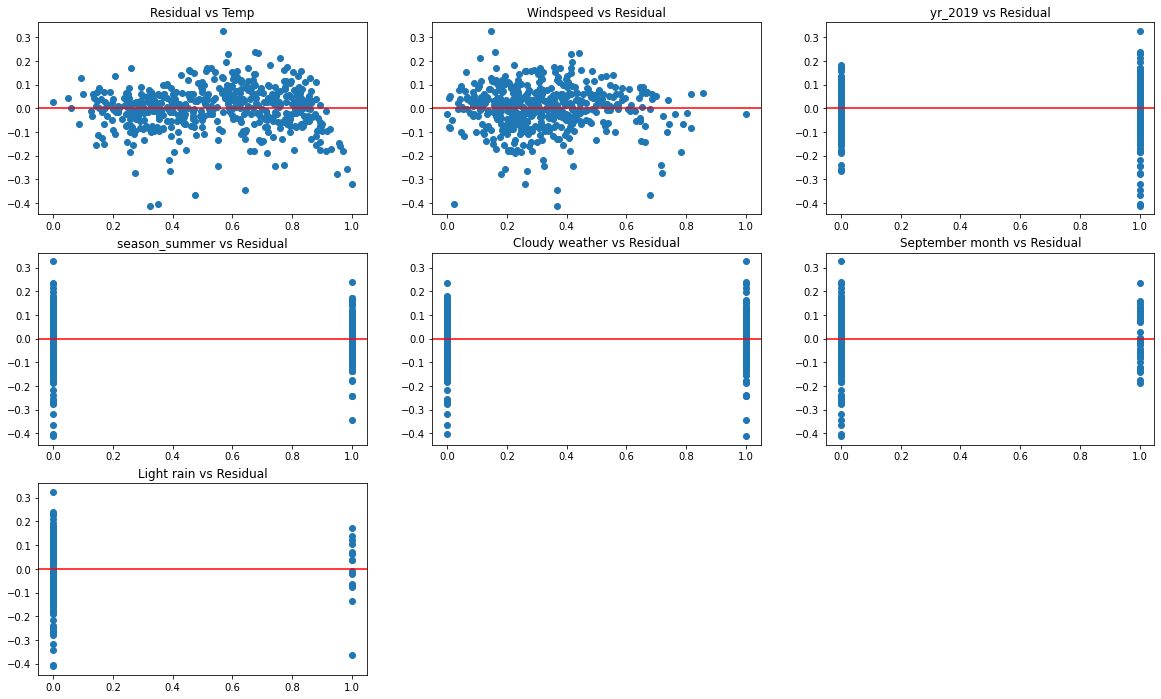

In [393]:
# Scatter Plot for all the residuals. Mostly all the means are being centered at 0

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
plt.scatter(X_train['temp'],res)
plt.title("Residual vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,2)
plt.scatter(X_train['windspeed'],res)
plt.title("Windspeed vs Residual")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,3)
plt.scatter(X_train['yr_2019'],res)
plt.title("yr_2019 vs Residual")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,4)
plt.scatter(X_train['season_summer'],res)
plt.title("season_summer vs Residual")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,5)
plt.scatter(X_train['weathersit_Cloudy'],res)
plt.title("Cloudy weather vs Residual")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,6)
plt.scatter(X_train['mnth_Sept'],res)
plt.title("September month vs Residual")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,7)
plt.scatter(X_train['weathersit_Light Rain'],res)
plt.title("Light rain vs Residual")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

C:\Users\asd\AppData\Local\Temp\ipykernel_13576\1221253817.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot((res),bins=20)


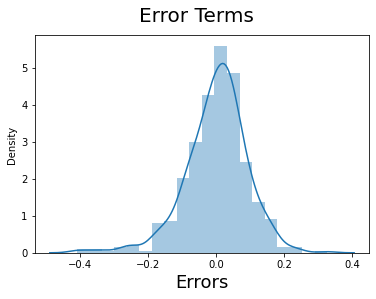

In [353]:
# Plot the distribution of errors
fig=plt.figure()
sb.distplot((res),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=18)
plt.show()

# <b style='color:green;'>Prediction on Test setup:</b>

-  We need to so same scaling on the test set that we did on the prediction set.
-  We never use .fit on the test set because in ML we never use test set to make predictions or anything. Our test set is the unseen data and we still don't have it. We pretend we don't have that data. 
-  We only transform on the test set and not fit.

In [354]:
num_vars = ['temp','atemp','hum','casual','registered','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

C:\Users\asd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [355]:
# Splitting df_test into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [356]:
# Adding constant variable to test dataframe
X_test_new = sm.add_constant(X_test)

In [357]:
X_test_new = X_test_new.drop(['atemp','hum', 'casual', 'registered','holiday_No Holiday', 'workingday_workingday', 'season_spring','mnth_Aug', 'mnth_Dec', 'mnth_Feb','mnth_Jan', 'mnth_July', 'mnth_June', 'mnth_Mar', 'mnth_May','mnth_Nov', 'mnth_Oct', 'weekday_Sat','weekday_Sun', 'weekday_Thurs', 'weekday_Tue', 'weekday_Wed'], axis = 1)

In [358]:
# Making predictions using the 20 model
y_pred_new = lr1.predict(X_test_new)

In [359]:
r_squared = r2_score(y_test, y_pred_new)   # Calculating the r - squared
r_squared

0.7451287411022345

In [383]:
adj_R2 = 1-(1-r_squared)*(220-1)/(220-9-1)
adj_R2

0.7342056871494731

# Model Evaluation

Text(0, 0.5, 'y_pred')

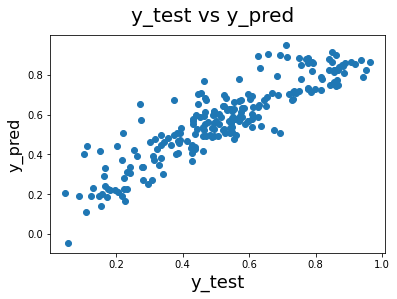

In [366]:
# Plot the y_test and y_pred on a graphic
fig = plt.figure()
plt.scatter(y_test, y_pred_new)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

# Final Equation 


$ y = 0.1285 + 0.5522  \times  temp -0.1552 \times windspeed + 0.2331 \times year2019 + 0.0892 \times summer + 0.1297 \times winter + 0.959 \times September -0.464 \times Monday - 0.0786 \times Cloudy - 0.2833 \times Light Rain $

### Apply Log Model

In [369]:
temp = (np.exp(0.5522)-1)*100
temp

73.70703720566456

In [371]:
sumi =  (np.exp(0.0892)-1)*100
sumi

9.329929432066608

In [372]:
win =  (np.exp(0.1297)-1)*100
win

13.848678605177733

In [373]:
sept =  (np.exp(0.0959)-1)*100
sept

10.064899359119138

In [374]:
cloud =  (np.exp(-0.0786)-1)*100
cloud

-7.559038565208375

In [376]:
light_rain =  (np.exp(-0.2833)-1)*100
light_rain

-24.670623417164084

In [378]:
year =  (np.exp(-0.2331)-1)*100
year

-20.792563787240258

In [380]:
wind =  (np.exp(-0.1522)-1)*100
wind

-14.118349973640443

-  Temperature Feature -:  Its coefficient is 0.5522 with p-value of 0 and VIF 3.72. When we apply log model to convert the beta co-efficinet into percentage, the formula is 〖(exp〗⁡(β_0 )-1)*100. When we apply our summer season co-efficient to this formula we get 73.70 . This means that in summer season, the count of passengers will increase by ≈73.70% on our base count as temprature rises 1 degree celcius.

- Summer Season: Its coefficient is 0.0892 with p-value of 0 and VIF 1.57. When we apply log model to convert the beta co-efficinet into percentage, the formula is 〖(exp〗⁡(β_0 )-1)*100. When we apply our summer season co-efficient to this formula we get 9.32. This means that in summer season, the count of passengers will increase by ≈9.32% on our base count.

- Winter Season: Its coefficient is 0.1297 with p-value of 0 and VIF 1.38. When we apply log model to convert the beta co-efficinet into percentage, the formula is 〖(exp〗⁡(β_0 )-1)*100. When we apply our winter season co-efficient to this formula, we get 13.84. This means that in winter season, the count of passengers will increase by ≈13.84% on our base count

- September Month: Its coefficient is 0.0959 with p-value of 0 and VIF 1.20. When we apply log model to convert the beta co-efficinet into percentage, the formula is 〖(exp〗⁡(β_0 )-1)*100. When we apply our september month co-efficient to this formula we get 10.06. This means that every september month, the count of passengers will increase by ≈10.06% on our base count.

- Cloudy weather: Its coefficient is -0.0786 with p-value of 0 and VIF 1.48. When we apply log model to convert the beta co-efficinet into percentage, the formula is 〖(exp〗⁡(β_0 )-1)*100. When we apply our Cloudy weather co-efficient to this formula, we get -7.55. This means that each time weather turns cloudy, the count of passengers will increase by ≈ -7.55% on our base count

- Light rain weather: Its coefficient is -0.2833 with p-value of 0 and VIF 1.08. When we apply log model to convert the beta co-efficinet into percentage, the formula is 〖(exp〗⁡(β_0 )-1)*100. When we apply our Cloudy weather co-efficient to this formula, we get -24.67. This means that each time weather turns cloudy, the count of passengers will increase by ≈ – 24.67% on our base count.

- Year 2019: Its coefficient is 0.2331 with p-value of 0 and VIF 2. When we apply log model to convert the beta co-efficinet into percentage, the formula is 〖(exp〗⁡(β_0 )-1)*100. When we apply our 2019 Year co-efficient to this formula, we get ≈ -26.79. This means that every year, the growht in number of people riding the service is growing by 26.79%


- Windspeed: Its coefficient is -0.1522 with p-value of 0 and VIF 2. When we apply log model to convert the beta co-efficinet into percentage, the formula is 〖(exp〗⁡(β_0 )-1)*100. When we apply  co-efficient to this formula, we get ≈ -14.11. This means that every year, the growht in number of people riding the service is growing by -14.11%

In [391]:
summary_df = pd.DataFrame({"Model Performance Metrics":["R-Squared Value","Adjusted R-Squared Value"],
                         "Train Set":[0.831,0.828],
                         "Test Set":[0.7451,0.7956]})

In [392]:
summary_df

,Model Performance Metrics,Train Set,Test Set
0,R-Squared Value,0.831,0.7451
1,Adjusted R-Squared Value,0.828,0.7956


#### Statistically significant and important predictor variables are as follows:
1. temp	
2.	windspeed	
3.	yr_2019	
4.	season_summer	
5.	weathersit_Cloudy	
6.	season_winter	
7.	mnth_Sept	
8.	weekday_Mon	
9.	weathersit_Light Rain	

### So the company should keep in mind the aforementioned predictor variables while preparing bike rental strategy.